In [1]:
#Data Analysis and Data Wrangling
import numpy as np
import pandas as pd
import missingno as mn
from collections import Counter 

#Data Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

#Setting up plot styles
sns.set_context("paper")
style.use('fivethirtyeight')

#Ml Algorithms
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor, RandomForestRegressor
from sklearn import neighbors, tree, svm
from xgboost import XGBClassifier, XGBRegressor
from sklearn.cluster import KMeans

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#Supress warnings
import warnings
warnings.filterwarnings('ignore')


# Exploratory Data Analysis

In [2]:
customer_train = pd.read_csv('Train.csv')
customer_test = pd.read_csv('Test.csv')

In [3]:
combined = customer_train.append(customer_test)

In [4]:
#We will examine the dimensions of our data

print('Dimensions')
print('Database dimension - store_train: ', customer_train.shape)
print('Database dimension - store_test: ', customer_test.shape)
print('Database dimension - combined: ', combined.shape)

print('-'*80)
print('\n')
print('-'*80)

print('Size')
print('Database size - store_train: ', customer_train.size)
print('Database size - store_test: ', customer_test.size)
print('Database size - combined: ', combined.size)


Dimensions
Database dimension - store_train:  (400000, 19)
Database dimension - store_test:  (100000, 18)
Database dimension - combined:  (500000, 19)
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
Size
Database size - store_train:  7600000
Database size - store_test:  1800000
Database size - combined:  9500000


### Checking the data types of our features

In [5]:
print('CUSTOMER CHURN TRAINING DATA INFO: ')
print('\n')
print(customer_train.info())
print('\n')
print('='*100)
print('\n')

print('CUSTOMER CHURN TESTING DATA INFO: ')
print('\n')
print(customer_test.info())

CUSTOMER CHURN TRAINING DATA INFO: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          242480 non-null  object 
 2   TENURE          400000 non-null  object 
 3   MONTANT         259723 non-null  float64
 4   FREQUENCE_RECH  259723 non-null  float64
 5   REVENUE         265337 non-null  float64
 6   ARPU_SEGMENT    265337 non-null  float64
 7   FREQUENCE       265337 non-null  float64
 8   DATA_VOLUME     203146 non-null  float64
 9   ON_NET          254181 non-null  float64
 10  ORANGE          233683 non-null  float64
 11  TIGO            160614 non-null  float64
 12  ZONE1           31690 non-null   float64
 13  ZONE2           25513 non-null   float64
 14  MRG             400000 non-null  object 
 15  REGULARITY      400000 non-null  int64  
 16  TOP_PACK        23

In [6]:
customer_train.describe(include='all')

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
count,400000,242480,400000,259723.000000,259723.000000,265337.000000,265337.000000,265337.000000,203146.000000,254181.000000,233683.000000,160614.000000,31690.000000,25513.000000,400000,400000.000000,232671,232671.000000,400000.00000
unique,400000,14,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,111,NaN,NaN
top,ec75fa8e5a375240542630aea7b4859573038e2f,DAKAR,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,All-net 500F=2000F;5d,NaN,NaN
freq,1,95517,379439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400000,NaN,58675,NaN,NaN
mean,NaN,NaN,NaN,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,NaN,28.046502,NaN,9.254209,0.18711
std,NaN,NaN,NaN,7099.640630,13.275514,7175.802367,2391.929290,14.679943,12281.867504,873.593034,204.733272,63.061871,35.642843,26.964028,NaN,22.282773,NaN,12.305563,0.39000
min,NaN,NaN,NaN,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,1.000000,0.00000
25%,NaN,NaN,NaN,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,NaN,6.000000,NaN,2.000000,0.00000
50%,NaN,NaN,NaN,3000.000000,6.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,1.000000,2.000000,NaN,24.000000,NaN,5.000000,0.00000
75%,NaN,NaN,NaN,7300.000000,15.000000,7340.000000,2447.000000,19.000000,2925.000000,155.000000,99.000000,20.000000,3.000000,5.000000,NaN,51.000000,NaN,12.000000,0.00000


## NULL VALUE CALCULATION

In [7]:
#Defining a function to count the null values in our dataset, and the percentage of null values in each feature, and creating 
#a new dataframe to store our results

def null_counter(dataframe):
    """A function to calculate the number and % of null values in a dataframe."""
    null_values = {}
    
    #Getting all the column titles
    col = dataframe.columns
    
    #Getting the number of missing values in each column of our dataframe
    null_count = dataframe.isnull().sum()
    
    #Calculating the percentage of missing values in each column
    null_val = []
    for i in col:
        null_perc = (customer_train[i].isnull().sum()*100) / customer_train.shape[0]
        null_train_percentage = pd.DataFrame((customer_train.isnull().sum())*100/customer_train.shape[0]).reset_index()
        null_val.append(null_perc)
        
    #Now making a dictionary containing the column titles, null values count and the % of null values 
    null_values['Columns'] = col
    null_values['Null values'] = null_count
    null_values['Null Values Percentage'] = null_val

    #drop=True prevents the index from showing when we print out our dataframe
    null_values = pd.DataFrame(null_values).reset_index(drop=True)
    return null_values

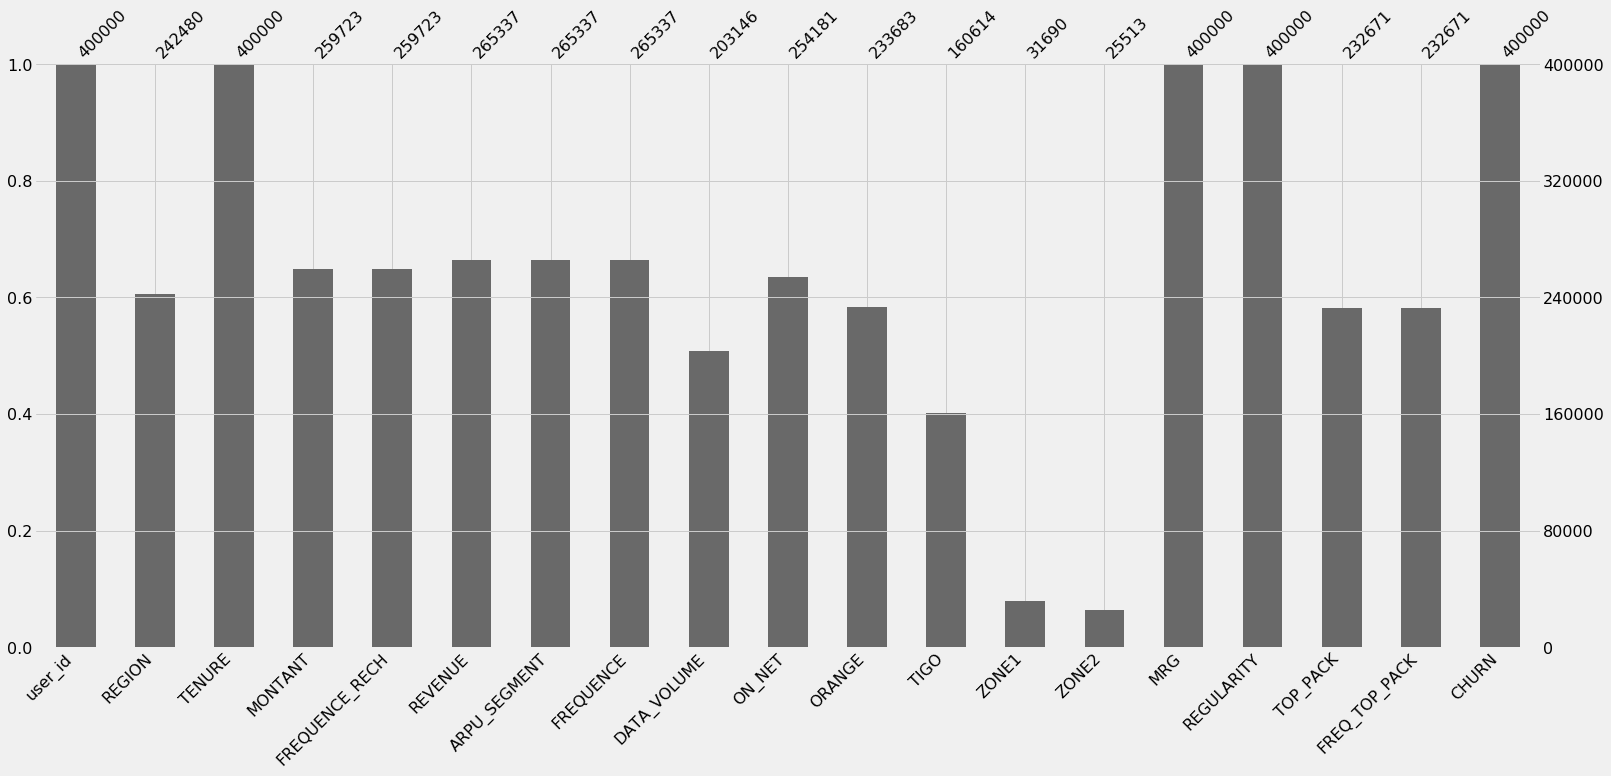

In [8]:
mn.bar(customer_train)
plt.show()

* Now I will make a new Dataframe consisting of the Column names, null values, and % of null values in our training dataset

In [9]:
null_counter(customer_train)

,Columns,Null values,Null Values Percentage
0,user_id,0,0.00000
1,REGION,157520,39.38000
2,TENURE,0,0.00000
3,MONTANT,140277,35.06925
4,FREQUENCE_RECH,140277,35.06925
5,REVENUE,134663,33.66575
6,ARPU_SEGMENT,134663,33.66575
7,FREQUENCE,134663,33.66575
8,DATA_VOLUME,196854,49.21350
9,ON_NET,145819,36.45475


* Most of the features in our training dataset are incomplete, and we will fill the missing values later

* 

### Visualizing the testing data

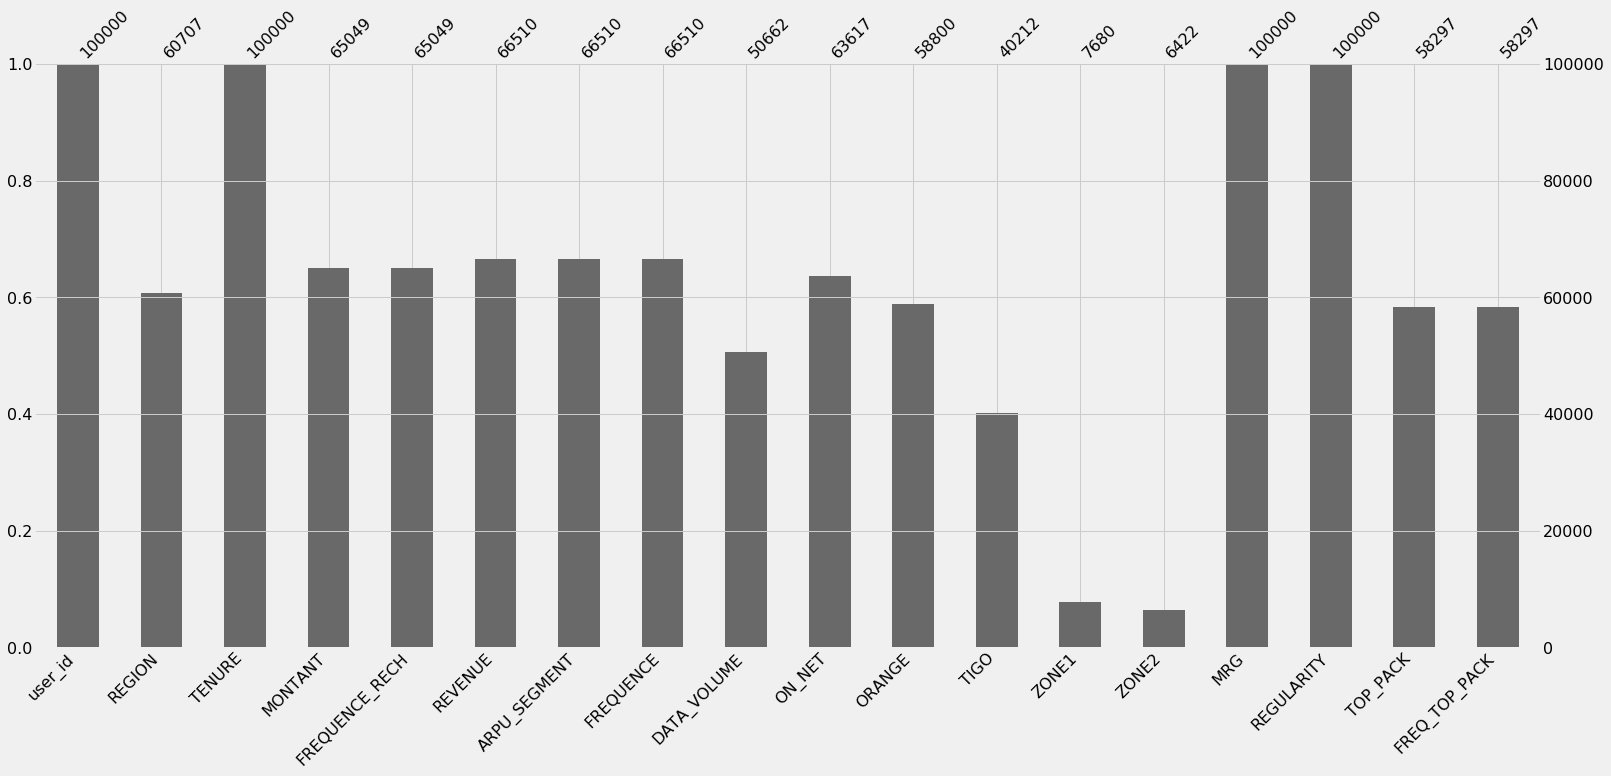

In [10]:
mn.bar(customer_test)
plt.show()

In [11]:
def null_counter(dataframe):
    """A function to calculate the number and % of null values in a dataframe."""
    null_values = {}
    
    #Getting all the column titles
    col = dataframe.columns
    
    #Getting the number of missing values in each column of our dataframe
    null_count = dataframe.isnull().sum()
    
    #Calculating the percentage of missing values in each column
    null_val = []
    for i in col:
        null_perc = (customer_test[i].isnull().sum()*100) / customer_test.shape[0]
        null_test_percentage = pd.DataFrame((customer_test.isnull().sum())*100/customer_test.shape[0]).reset_index()
        null_val.append(null_perc)
        
    #Now making a dictionary containing the column titles, null values count and the % of null values 
    null_values['Columns'] = col
    null_values['Null values'] = null_count
    null_values['Null Values Percentage'] = null_val

    #drop=True prevents the index from showing when we print out our dataframe
    null_values = pd.DataFrame(null_values).reset_index(drop=True)
    
    return null_values

In [12]:
null_counter(customer_test)

,Columns,Null values,Null Values Percentage
0,user_id,0,0.000
1,REGION,39293,39.293
2,TENURE,0,0.000
3,MONTANT,34951,34.951
4,FREQUENCE_RECH,34951,34.951
5,REVENUE,33490,33.490
6,ARPU_SEGMENT,33490,33.490
7,FREQUENCE,33490,33.490
8,DATA_VOLUME,49338,49.338
9,ON_NET,36383,36.383


### Most of the features in our testing dataset have missing values

### NUMERICAL VARIABLE ANALYSIS

#### CORRELATION MATRIX

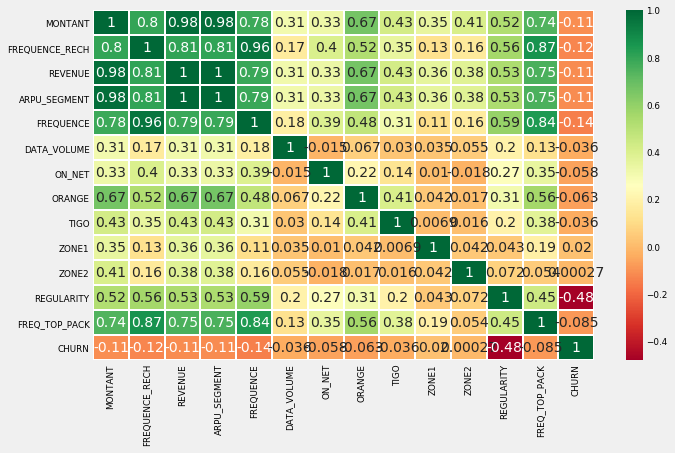

In [13]:
#Plotting a heatmap of the Pearson Correlation of all the variables in our train dataset 
plt.figure(figsize=(10, 6))
ax = sns.heatmap(customer_train.corr(), annot=True, cmap="RdYlGn", lw=1)
plt.show()

* There is a lot of positive correlation

### Checking our target variable, CHURN

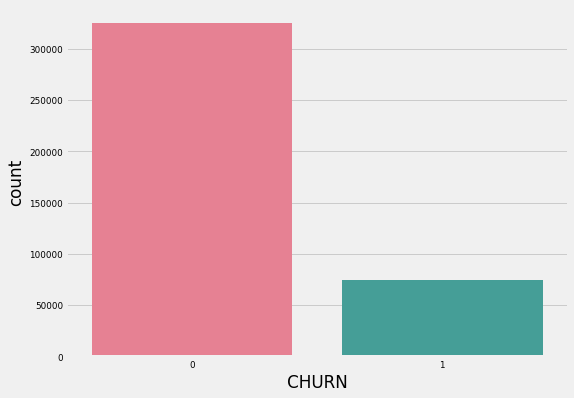

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(customer_train['CHURN'], palette='husl')
plt.show()

* We can see that most of the customers churned

## DATA CLEANING

## TREATING THE MISSING DATA

#### NOTE: It is never a good option to delete missing data, because this reduces your sample size and could lead to training a bias model, so do it only when the data missing is very small. Check below to see the different wayts of deleting or imputing missing data

### Firstly you have to see whether you can fill data intuitively, this works best with categorical variables.
* You will look for correlation between variables and fill missing data based on that . E.g. If we have 2 variables 'Store Size' and 'Store Location', If we have missing values in Store Size, we can intuitevely say that, there is a good chance of having a bigger store in a densely populated location, and we will check our data to see if there is such correlation. And if we have such correlation betweeen the data that is not missing in this 2 variables, we can fill the missing data based on this correlation. To see a real life example, check my solution on 'Retail Challenge in the DSN Hackathon, or check my 'Better Titanic Model Feature Engineering' in the kaggle hackathon.

### If what you have mainly are numerical variables, then fill thus:

### Three ways of handling data with NaN

* Drop such missing value, or row, or column (if the number of valid entries is too small compared to the overall data). Drop when you have lets say up to 80% missing data in a particular column

* Replace all invalid entries with (either mean, median or mode). Replace with median (if the data is numerical(continuous)) and replace using mode (if the data is categorical).
* Reduce the dimension of the data to the number of valid information for all corresponding columns. This is only 
  effective, if the column of interest is a key indicator in determining the target value (survived).

### From the 1st point above(3 handling data with NaN) When deleting/dropping data there are 3 ways
#### Pairwise Deletion
* Parwise Deletion is used when values are missing completely at random i.e MCAR. During Pairwise deletion, only the missing values are deleted. All operations in pandas like mean,sum etc intrinsically skip missing values.

#### Listwise Deletion/ Dropping rows
* During Listwise deletion, complete rows(which contain the missing values) are deleted. As a result, it is also called Complete Case deletion. Like Pairwise deletion, listwise deletions are also only used for MCAR values.

#### Dropping complete columns
* If a column contains a lot of missing values, say more than 80%, and the feature is not significant, you might want to delete that feature. However, again, it is not a good methodology to delete data.

## DROPPING COLUMNS WITH MORE THAN 80% MISSING DATA

In [15]:
#From the explanations above, Variables ZONE1 and ZONE2 are missing over 90% of data, so I will drop them 
#completely(drop the columns). I will be doing the same for both training and testing data

for dataset in [customer_train, customer_test]:
    dataset.drop(['ZONE1'], 1, inplace=True)
    dataset.drop(['ZONE2'], 1, inplace=True)

* For all the other variables with missing values, we will be imputing using statistics(mean, median, mode, etc) of each column in which data is missing as stated above
* For categorical variable impute the mode
* For continous numerical variable impute the median
* 

* We have 14 numerical variables of which 2 has been dropped(ZONE1, ZONE2)
* We have 3 categorical variables in which 2 are incomplete(REGION and TOP_PACK)

## FILLING MISSING VALUES FOR NUMERICAL VARIABLES
* For all the other continous numerical variables that have not been dropped, I will be filling them with them with "-99999". except the variables 'REGULARITY' and 'CHURN' that have no missing values
* I WILL BE FILLING BOTH TRAINING AND TESTING DATA SIMULTANEOUSLY


In [16]:
for dataset in [customer_train, customer_test]:
    dataset['MONTANT'] = dataset['MONTANT'].fillna(-99999)
    dataset['FREQUENCE_RECH'] = dataset['FREQUENCE_RECH'].fillna(-99999)
    dataset['REVENUE'] = dataset['REVENUE'].fillna(-99999)
    dataset['ARPU_SEGMENT'] = dataset['ARPU_SEGMENT'].fillna(-99999)
    dataset['FREQUENCE'] = dataset['FREQUENCE'].fillna(-99999)
    dataset['DATA_VOLUME'] = dataset['DATA_VOLUME'].fillna(-99999)
    dataset['ON_NET'] = dataset['ON_NET'].fillna(-99999)
    dataset['ORANGE'] = dataset['ORANGE'].fillna(-99999)
    dataset['TIGO'] = dataset['TIGO'].fillna(-99999)
    dataset['FREQ_TOP_PACK'] = dataset['FREQ_TOP_PACK'].fillna(-99999)


* We will be filling the categorical variables with 'None'

In [17]:
for dataset in [customer_train, customer_test]:
    dataset['REGION'] = dataset['REGION'].fillna('None')
    dataset['TOP_PACK'] = dataset['TOP_PACK'].fillna('None')
    

In [18]:
#Now i will check for missing values again in our training and testing data
#Only the categorical variables should have missing data

print('Null values in Train data: ', customer_train.isnull().sum())
print('-'*100)
print('\n')
print('-'*100)
print('Null values in Test data: ', customer_test.isnull().sum())

Null values in Train data:  user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
Null values in Test data:  user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
dtype: int64


### LABEL ENCODING THE CATEGORICAL VARIABLES

In [19]:
#Now I am going to label encode the categorical variable in our data
#I will be encoding data in both the train and test data simultaneously

label = LabelEncoder()
for dataset in [customer_train, customer_test]:
    dataset['REGION_Code'] = label.fit_transform(dataset['REGION'])
    dataset['TENURE_Code'] = label.fit_transform(dataset['TENURE'])
    dataset['TOP_PACK_Code'] = label.fit_transform(dataset['TOP_PACK'])


# MODELLING

In [20]:
#I will select all the features that will be used for modelling

#For training
Features = ['CHURN', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
            'DATA_VOLUME','ON_NET', 'ORANGE', 'TIGO', 'FREQ_TOP_PACK', 
            'REGULARITY', 'REGION_Code','TENURE_Code', 'TOP_PACK_Code']

#For testing
Features_test = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
            'DATA_VOLUME','ON_NET', 'ORANGE', 'TIGO', 'FREQ_TOP_PACK', 
            'REGULARITY', 'REGION_Code','TENURE_Code', 'TOP_PACK_Code']

data_train = customer_train[Features]
data_test = customer_test[Features_test]

In [21]:
data_train.head()

,CHURN,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,FREQ_TOP_PACK,REGULARITY,REGION_Code,TENURE_Code,TOP_PACK_Code
0,0,17000.0,32.0,18000.0,6000.0,34.0,-99999.0,97.0,355.0,6.0,35.0,62,10,7,15
1,0,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,22.0,40,9,7,25
2,0,1500.0,3.0,1500.0,500.0,3.0,-99999.0,30.0,30.0,-99999.0,3.0,32,12,7,15
3,0,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,3.0,18,2,7,85
4,0,-99999.0,-99999.0,498.0,166.0,3.0,1.0,1.0,3.0,-99999.0,-99999.0,50,2,7,83


In [22]:
y = data_train["CHURN"]
X = data_train.drop(['CHURN'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


pipe1 = Pipeline([("scaler", StandardScaler()), ("model", LinearRegression())])
pipe2 = Pipeline([("scaler", StandardScaler()), ("model", LogisticRegression())])
pipe3 = Pipeline([("scaler", StandardScaler()), ("model", neighbors.KNeighborsClassifier())])
pipe4 = Pipeline([("scaler", StandardScaler()), ("model", tree.DecisionTreeClassifier())])
pipe5 = Pipeline([("scaler", StandardScaler()), ("model", XGBClassifier())])
pipe6 = Pipeline([("scaler", StandardScaler()), ("model", RandomForestClassifier())])
pipe7 = Pipeline([("scaler", StandardScaler()), ("model", GradientBoostingClassifier())])
pipe8 = Pipeline([("scaler", StandardScaler()), ("model", svm.LinearSVC())])
pipe9 = Pipeline([("scaler", StandardScaler()), ("model", svm.SVC())])

pipe10 = Pipeline([("scaler", StandardScaler()), ("model", CatBoostClassifier(n_estimators=10000, 
                                                                              max_depth=6, 
                                                                              eval_metric='AUC', 
                                                                              reg_lambda = 370

))])
pipe11 = Pipeline([("scaler", StandardScaler()), ("model", LGBMClassifier(objective =  'binary', 
                            metric= 'auc',
                            boosting_type= 'gbdt',
                            lambda_l1= 0.0004912993970392775,
                            lambda_l2= 9.424350138808432,
                            num_leaves= 24,
                            feature_fraction= 1.0,
                            bagging_fraction= 0.9540416539312312,
                            bagging_freq= 7,
                            min_child_samples= 100, n_estimators = 300

))])




In [74]:
pipe1.fit(X_train, y_train)
print('Done')
pipe2.fit(X_train, y_train)
print('Done')
pipe3.fit(X_train, y_train)
print('Done')
pipe4.fit(X_train, y_train)
print('Done')
pipe5.fit(X_train, y_train)
print('Done')
pipe6.fit(X_train, y_train)
print('Done')
pipe7.fit(X_train, y_train)
print('Done')
#pipe8.fit(X_train, y_train)
#pipe9.fit(X_train, y_train)
pipe10.fit(X_train, y_train)
print('Done')
pipe11.fit(X_train, y_train)
print('Done')



Done
Done
Done
Done
Done
Done
Done
0:	total: 149ms	remaining: 24m 52s
1:	total: 253ms	remaining: 21m 5s
2:	total: 351ms	remaining: 19m 31s
3:	total: 461ms	remaining: 19m 12s
4:	total: 565ms	remaining: 18m 49s
5:	total: 638ms	remaining: 17m 43s
6:	total: 701ms	remaining: 16m 40s
7:	total: 766ms	remaining: 15m 57s
8:	total: 827ms	remaining: 15m 18s
9:	total: 892ms	remaining: 14m 51s
10:	total: 958ms	remaining: 14m 30s
11:	total: 1.03s	remaining: 14m 16s
12:	total: 1.09s	remaining: 14m 1s
13:	total: 1.17s	remaining: 13m 53s
14:	total: 1.23s	remaining: 13m 38s
15:	total: 1.29s	remaining: 13m 28s
16:	total: 1.36s	remaining: 13m 19s
17:	total: 1.43s	remaining: 13m 10s
18:	total: 1.49s	remaining: 13m 2s
19:	total: 1.55s	remaining: 12m 55s
20:	total: 1.64s	remaining: 12m 59s
21:	total: 1.76s	remaining: 13m 19s
22:	total: 1.85s	remaining: 13m 24s
23:	total: 1.94s	remaining: 13m 24s
24:	total: 2s	remaining: 13m 18s
25:	total: 2.06s	remaining: 13m 11s
26:	total: 2.13s	remaining: 13m 6s
27:	total:

226:	total: 15.5s	remaining: 11m 7s
227:	total: 15.6s	remaining: 11m 6s
228:	total: 15.6s	remaining: 11m 6s
229:	total: 15.7s	remaining: 11m 6s
230:	total: 15.7s	remaining: 11m 5s
231:	total: 15.8s	remaining: 11m 5s
232:	total: 15.9s	remaining: 11m 5s
233:	total: 15.9s	remaining: 11m 5s
234:	total: 16s	remaining: 11m 5s
235:	total: 16.1s	remaining: 11m 4s
236:	total: 16.1s	remaining: 11m 4s
237:	total: 16.3s	remaining: 11m 6s
238:	total: 16.3s	remaining: 11m 7s
239:	total: 16.4s	remaining: 11m 8s
240:	total: 16.6s	remaining: 11m 10s
241:	total: 16.6s	remaining: 11m 10s
242:	total: 16.7s	remaining: 11m 11s
243:	total: 16.8s	remaining: 11m 11s
244:	total: 16.9s	remaining: 11m 12s
245:	total: 17s	remaining: 11m 12s
246:	total: 17.1s	remaining: 11m 13s
247:	total: 17.2s	remaining: 11m 15s
248:	total: 17.3s	remaining: 11m 16s
249:	total: 17.4s	remaining: 11m 16s
250:	total: 17.4s	remaining: 11m 16s
251:	total: 17.5s	remaining: 11m 16s
252:	total: 17.5s	remaining: 11m 15s
253:	total: 17.6s	r

451:	total: 32.5s	remaining: 11m 26s
452:	total: 32.6s	remaining: 11m 26s
453:	total: 32.7s	remaining: 11m 27s
454:	total: 32.8s	remaining: 11m 28s
455:	total: 32.9s	remaining: 11m 28s
456:	total: 32.9s	remaining: 11m 27s
457:	total: 33s	remaining: 11m 27s
458:	total: 33s	remaining: 11m 27s
459:	total: 33.1s	remaining: 11m 26s
460:	total: 33.2s	remaining: 11m 26s
461:	total: 33.2s	remaining: 11m 25s
462:	total: 33.3s	remaining: 11m 25s
463:	total: 33.3s	remaining: 11m 25s
464:	total: 33.4s	remaining: 11m 24s
465:	total: 33.5s	remaining: 11m 24s
466:	total: 33.5s	remaining: 11m 24s
467:	total: 33.6s	remaining: 11m 25s
468:	total: 33.7s	remaining: 11m 25s
469:	total: 33.8s	remaining: 11m 25s
470:	total: 33.9s	remaining: 11m 25s
471:	total: 34s	remaining: 11m 25s
472:	total: 34s	remaining: 11m 25s
473:	total: 34.1s	remaining: 11m 25s
474:	total: 34.2s	remaining: 11m 25s
475:	total: 34.2s	remaining: 11m 24s
476:	total: 34.3s	remaining: 11m 24s
477:	total: 34.3s	remaining: 11m 24s
478:	tota

680:	total: 48s	remaining: 10m 56s
681:	total: 48s	remaining: 10m 56s
682:	total: 48.1s	remaining: 10m 56s
683:	total: 48.2s	remaining: 10m 56s
684:	total: 48.2s	remaining: 10m 55s
685:	total: 48.3s	remaining: 10m 55s
686:	total: 48.3s	remaining: 10m 55s
687:	total: 48.4s	remaining: 10m 55s
688:	total: 48.5s	remaining: 10m 54s
689:	total: 48.5s	remaining: 10m 54s
690:	total: 48.6s	remaining: 10m 54s
691:	total: 48.6s	remaining: 10m 54s
692:	total: 48.7s	remaining: 10m 53s
693:	total: 48.8s	remaining: 10m 53s
694:	total: 48.8s	remaining: 10m 53s
695:	total: 48.9s	remaining: 10m 53s
696:	total: 49s	remaining: 10m 53s
697:	total: 49s	remaining: 10m 53s
698:	total: 49.1s	remaining: 10m 53s
699:	total: 49.1s	remaining: 10m 52s
700:	total: 49.2s	remaining: 10m 52s
701:	total: 49.3s	remaining: 10m 52s
702:	total: 49.3s	remaining: 10m 52s
703:	total: 49.4s	remaining: 10m 52s
704:	total: 49.5s	remaining: 10m 52s
705:	total: 49.5s	remaining: 10m 51s
706:	total: 49.6s	remaining: 10m 51s
707:	tota

904:	total: 1m	remaining: 10m 11s
905:	total: 1m	remaining: 10m 11s
906:	total: 1m	remaining: 10m 11s
907:	total: 1m 1s	remaining: 10m 11s
908:	total: 1m 1s	remaining: 10m 10s
909:	total: 1m 1s	remaining: 10m 10s
910:	total: 1m 1s	remaining: 10m 10s
911:	total: 1m 1s	remaining: 10m 10s
912:	total: 1m 1s	remaining: 10m 9s
913:	total: 1m 1s	remaining: 10m 9s
914:	total: 1m 1s	remaining: 10m 9s
915:	total: 1m 1s	remaining: 10m 9s
916:	total: 1m 1s	remaining: 10m 9s
917:	total: 1m 1s	remaining: 10m 8s
918:	total: 1m 1s	remaining: 10m 8s
919:	total: 1m 1s	remaining: 10m 8s
920:	total: 1m 1s	remaining: 10m 8s
921:	total: 1m 1s	remaining: 10m 8s
922:	total: 1m 1s	remaining: 10m 7s
923:	total: 1m 1s	remaining: 10m 7s
924:	total: 1m 1s	remaining: 10m 7s
925:	total: 1m 1s	remaining: 10m 7s
926:	total: 1m 2s	remaining: 10m 7s
927:	total: 1m 2s	remaining: 10m 7s
928:	total: 1m 2s	remaining: 10m 7s
929:	total: 1m 2s	remaining: 10m 7s
930:	total: 1m 2s	remaining: 10m 7s
931:	total: 1m 2s	remaining: 

1128:	total: 1m 13s	remaining: 9m 36s
1129:	total: 1m 13s	remaining: 9m 36s
1130:	total: 1m 13s	remaining: 9m 36s
1131:	total: 1m 13s	remaining: 9m 36s
1132:	total: 1m 13s	remaining: 9m 35s
1133:	total: 1m 13s	remaining: 9m 35s
1134:	total: 1m 13s	remaining: 9m 35s
1135:	total: 1m 13s	remaining: 9m 35s
1136:	total: 1m 13s	remaining: 9m 35s
1137:	total: 1m 13s	remaining: 9m 35s
1138:	total: 1m 13s	remaining: 9m 35s
1139:	total: 1m 13s	remaining: 9m 34s
1140:	total: 1m 14s	remaining: 9m 34s
1141:	total: 1m 14s	remaining: 9m 34s
1142:	total: 1m 14s	remaining: 9m 34s
1143:	total: 1m 14s	remaining: 9m 34s
1144:	total: 1m 14s	remaining: 9m 34s
1145:	total: 1m 14s	remaining: 9m 34s
1146:	total: 1m 14s	remaining: 9m 33s
1147:	total: 1m 14s	remaining: 9m 33s
1148:	total: 1m 14s	remaining: 9m 33s
1149:	total: 1m 14s	remaining: 9m 33s
1150:	total: 1m 14s	remaining: 9m 33s
1151:	total: 1m 14s	remaining: 9m 32s
1152:	total: 1m 14s	remaining: 9m 32s
1153:	total: 1m 14s	remaining: 9m 32s
1154:	total:

1345:	total: 1m 25s	remaining: 9m 10s
1346:	total: 1m 25s	remaining: 9m 10s
1347:	total: 1m 25s	remaining: 9m 10s
1348:	total: 1m 25s	remaining: 9m 10s
1349:	total: 1m 25s	remaining: 9m 10s
1350:	total: 1m 26s	remaining: 9m 10s
1351:	total: 1m 26s	remaining: 9m 11s
1352:	total: 1m 26s	remaining: 9m 11s
1353:	total: 1m 26s	remaining: 9m 11s
1354:	total: 1m 26s	remaining: 9m 11s
1355:	total: 1m 26s	remaining: 9m 11s
1356:	total: 1m 26s	remaining: 9m 10s
1357:	total: 1m 26s	remaining: 9m 11s
1358:	total: 1m 26s	remaining: 9m 11s
1359:	total: 1m 26s	remaining: 9m 11s
1360:	total: 1m 26s	remaining: 9m 11s
1361:	total: 1m 26s	remaining: 9m 11s
1362:	total: 1m 26s	remaining: 9m 11s
1363:	total: 1m 27s	remaining: 9m 10s
1364:	total: 1m 27s	remaining: 9m 10s
1365:	total: 1m 27s	remaining: 9m 10s
1366:	total: 1m 27s	remaining: 9m 10s
1367:	total: 1m 27s	remaining: 9m 10s
1368:	total: 1m 27s	remaining: 9m 10s
1369:	total: 1m 27s	remaining: 9m 10s
1370:	total: 1m 27s	remaining: 9m 10s
1371:	total:

1567:	total: 1m 40s	remaining: 8m 57s
1568:	total: 1m 40s	remaining: 8m 57s
1569:	total: 1m 40s	remaining: 8m 57s
1570:	total: 1m 40s	remaining: 8m 57s
1571:	total: 1m 40s	remaining: 8m 57s
1572:	total: 1m 40s	remaining: 8m 57s
1573:	total: 1m 40s	remaining: 8m 57s
1574:	total: 1m 40s	remaining: 8m 57s
1575:	total: 1m 40s	remaining: 8m 56s
1576:	total: 1m 40s	remaining: 8m 56s
1577:	total: 1m 40s	remaining: 8m 56s
1578:	total: 1m 40s	remaining: 8m 56s
1579:	total: 1m 40s	remaining: 8m 56s
1580:	total: 1m 40s	remaining: 8m 56s
1581:	total: 1m 40s	remaining: 8m 56s
1582:	total: 1m 40s	remaining: 8m 56s
1583:	total: 1m 40s	remaining: 8m 55s
1584:	total: 1m 40s	remaining: 8m 55s
1585:	total: 1m 40s	remaining: 8m 55s
1586:	total: 1m 41s	remaining: 8m 55s
1587:	total: 1m 41s	remaining: 8m 55s
1588:	total: 1m 41s	remaining: 8m 55s
1589:	total: 1m 41s	remaining: 8m 55s
1590:	total: 1m 41s	remaining: 8m 55s
1591:	total: 1m 41s	remaining: 8m 55s
1592:	total: 1m 41s	remaining: 8m 55s
1593:	total:

1785:	total: 1m 52s	remaining: 8m 39s
1786:	total: 1m 52s	remaining: 8m 39s
1787:	total: 1m 53s	remaining: 8m 39s
1788:	total: 1m 53s	remaining: 8m 39s
1789:	total: 1m 53s	remaining: 8m 39s
1790:	total: 1m 53s	remaining: 8m 39s
1791:	total: 1m 53s	remaining: 8m 39s
1792:	total: 1m 53s	remaining: 8m 39s
1793:	total: 1m 53s	remaining: 8m 39s
1794:	total: 1m 53s	remaining: 8m 39s
1795:	total: 1m 53s	remaining: 8m 39s
1796:	total: 1m 53s	remaining: 8m 39s
1797:	total: 1m 53s	remaining: 8m 39s
1798:	total: 1m 53s	remaining: 8m 39s
1799:	total: 1m 53s	remaining: 8m 39s
1800:	total: 1m 54s	remaining: 8m 39s
1801:	total: 1m 54s	remaining: 8m 39s
1802:	total: 1m 54s	remaining: 8m 39s
1803:	total: 1m 54s	remaining: 8m 39s
1804:	total: 1m 54s	remaining: 8m 38s
1805:	total: 1m 54s	remaining: 8m 38s
1806:	total: 1m 54s	remaining: 8m 38s
1807:	total: 1m 54s	remaining: 8m 38s
1808:	total: 1m 54s	remaining: 8m 38s
1809:	total: 1m 54s	remaining: 8m 38s
1810:	total: 1m 54s	remaining: 8m 38s
1811:	total:

2006:	total: 2m 9s	remaining: 8m 34s
2007:	total: 2m 9s	remaining: 8m 33s
2008:	total: 2m 9s	remaining: 8m 33s
2009:	total: 2m 9s	remaining: 8m 33s
2010:	total: 2m 9s	remaining: 8m 33s
2011:	total: 2m 9s	remaining: 8m 33s
2012:	total: 2m 9s	remaining: 8m 33s
2013:	total: 2m 9s	remaining: 8m 33s
2014:	total: 2m 9s	remaining: 8m 33s
2015:	total: 2m 9s	remaining: 8m 33s
2016:	total: 2m 9s	remaining: 8m 33s
2017:	total: 2m 9s	remaining: 8m 33s
2018:	total: 2m 9s	remaining: 8m 33s
2019:	total: 2m 9s	remaining: 8m 33s
2020:	total: 2m 9s	remaining: 8m 33s
2021:	total: 2m 10s	remaining: 8m 33s
2022:	total: 2m 10s	remaining: 8m 32s
2023:	total: 2m 10s	remaining: 8m 32s
2024:	total: 2m 10s	remaining: 8m 32s
2025:	total: 2m 10s	remaining: 8m 32s
2026:	total: 2m 10s	remaining: 8m 32s
2027:	total: 2m 10s	remaining: 8m 32s
2028:	total: 2m 10s	remaining: 8m 32s
2029:	total: 2m 10s	remaining: 8m 32s
2030:	total: 2m 10s	remaining: 8m 32s
2031:	total: 2m 10s	remaining: 8m 32s
2032:	total: 2m 10s	remaini

2223:	total: 2m 21s	remaining: 8m 14s
2224:	total: 2m 21s	remaining: 8m 14s
2225:	total: 2m 21s	remaining: 8m 14s
2226:	total: 2m 21s	remaining: 8m 14s
2227:	total: 2m 21s	remaining: 8m 14s
2228:	total: 2m 21s	remaining: 8m 14s
2229:	total: 2m 21s	remaining: 8m 13s
2230:	total: 2m 21s	remaining: 8m 13s
2231:	total: 2m 21s	remaining: 8m 13s
2232:	total: 2m 21s	remaining: 8m 13s
2233:	total: 2m 21s	remaining: 8m 13s
2234:	total: 2m 22s	remaining: 8m 13s
2235:	total: 2m 22s	remaining: 8m 13s
2236:	total: 2m 22s	remaining: 8m 13s
2237:	total: 2m 22s	remaining: 8m 13s
2238:	total: 2m 22s	remaining: 8m 13s
2239:	total: 2m 22s	remaining: 8m 12s
2240:	total: 2m 22s	remaining: 8m 12s
2241:	total: 2m 22s	remaining: 8m 12s
2242:	total: 2m 22s	remaining: 8m 12s
2243:	total: 2m 22s	remaining: 8m 12s
2244:	total: 2m 22s	remaining: 8m 12s
2245:	total: 2m 22s	remaining: 8m 12s
2246:	total: 2m 22s	remaining: 8m 12s
2247:	total: 2m 22s	remaining: 8m 12s
2248:	total: 2m 22s	remaining: 8m 12s
2249:	total:

2442:	total: 2m 32s	remaining: 7m 52s
2443:	total: 2m 32s	remaining: 7m 52s
2444:	total: 2m 32s	remaining: 7m 52s
2445:	total: 2m 32s	remaining: 7m 52s
2446:	total: 2m 33s	remaining: 7m 52s
2447:	total: 2m 33s	remaining: 7m 52s
2448:	total: 2m 33s	remaining: 7m 52s
2449:	total: 2m 33s	remaining: 7m 51s
2450:	total: 2m 33s	remaining: 7m 51s
2451:	total: 2m 33s	remaining: 7m 51s
2452:	total: 2m 33s	remaining: 7m 51s
2453:	total: 2m 33s	remaining: 7m 51s
2454:	total: 2m 33s	remaining: 7m 51s
2455:	total: 2m 33s	remaining: 7m 51s
2456:	total: 2m 33s	remaining: 7m 51s
2457:	total: 2m 33s	remaining: 7m 51s
2458:	total: 2m 33s	remaining: 7m 51s
2459:	total: 2m 33s	remaining: 7m 50s
2460:	total: 2m 33s	remaining: 7m 50s
2461:	total: 2m 33s	remaining: 7m 50s
2462:	total: 2m 33s	remaining: 7m 50s
2463:	total: 2m 33s	remaining: 7m 50s
2464:	total: 2m 33s	remaining: 7m 50s
2465:	total: 2m 33s	remaining: 7m 50s
2466:	total: 2m 33s	remaining: 7m 50s
2467:	total: 2m 34s	remaining: 7m 50s
2468:	total:

2662:	total: 2m 44s	remaining: 7m 32s
2663:	total: 2m 44s	remaining: 7m 32s
2664:	total: 2m 44s	remaining: 7m 32s
2665:	total: 2m 44s	remaining: 7m 31s
2666:	total: 2m 44s	remaining: 7m 31s
2667:	total: 2m 44s	remaining: 7m 31s
2668:	total: 2m 44s	remaining: 7m 31s
2669:	total: 2m 44s	remaining: 7m 31s
2670:	total: 2m 44s	remaining: 7m 31s
2671:	total: 2m 44s	remaining: 7m 31s
2672:	total: 2m 44s	remaining: 7m 31s
2673:	total: 2m 44s	remaining: 7m 31s
2674:	total: 2m 44s	remaining: 7m 31s
2675:	total: 2m 44s	remaining: 7m 30s
2676:	total: 2m 44s	remaining: 7m 30s
2677:	total: 2m 44s	remaining: 7m 30s
2678:	total: 2m 44s	remaining: 7m 30s
2679:	total: 2m 44s	remaining: 7m 30s
2680:	total: 2m 45s	remaining: 7m 30s
2681:	total: 2m 45s	remaining: 7m 30s
2682:	total: 2m 45s	remaining: 7m 30s
2683:	total: 2m 45s	remaining: 7m 30s
2684:	total: 2m 45s	remaining: 7m 30s
2685:	total: 2m 45s	remaining: 7m 30s
2686:	total: 2m 45s	remaining: 7m 30s
2687:	total: 2m 45s	remaining: 7m 29s
2688:	total:

2882:	total: 2m 54s	remaining: 7m 11s
2883:	total: 2m 54s	remaining: 7m 11s
2884:	total: 2m 54s	remaining: 7m 11s
2885:	total: 2m 54s	remaining: 7m 10s
2886:	total: 2m 54s	remaining: 7m 10s
2887:	total: 2m 54s	remaining: 7m 10s
2888:	total: 2m 54s	remaining: 7m 10s
2889:	total: 2m 55s	remaining: 7m 10s
2890:	total: 2m 55s	remaining: 7m 10s
2891:	total: 2m 55s	remaining: 7m 10s
2892:	total: 2m 55s	remaining: 7m 10s
2893:	total: 2m 55s	remaining: 7m 10s
2894:	total: 2m 55s	remaining: 7m 10s
2895:	total: 2m 55s	remaining: 7m 10s
2896:	total: 2m 55s	remaining: 7m 9s
2897:	total: 2m 55s	remaining: 7m 9s
2898:	total: 2m 55s	remaining: 7m 9s
2899:	total: 2m 55s	remaining: 7m 9s
2900:	total: 2m 55s	remaining: 7m 9s
2901:	total: 2m 55s	remaining: 7m 9s
2902:	total: 2m 55s	remaining: 7m 9s
2903:	total: 2m 55s	remaining: 7m 9s
2904:	total: 2m 55s	remaining: 7m 9s
2905:	total: 2m 55s	remaining: 7m 9s
2906:	total: 2m 55s	remaining: 7m 9s
2907:	total: 2m 55s	remaining: 7m 8s
2908:	total: 2m 55s	rema

3110:	total: 3m 6s	remaining: 6m 52s
3111:	total: 3m 6s	remaining: 6m 51s
3112:	total: 3m 6s	remaining: 6m 51s
3113:	total: 3m 6s	remaining: 6m 51s
3114:	total: 3m 6s	remaining: 6m 51s
3115:	total: 3m 6s	remaining: 6m 51s
3116:	total: 3m 6s	remaining: 6m 51s
3117:	total: 3m 6s	remaining: 6m 51s
3118:	total: 3m 6s	remaining: 6m 51s
3119:	total: 3m 6s	remaining: 6m 51s
3120:	total: 3m 6s	remaining: 6m 51s
3121:	total: 3m 6s	remaining: 6m 51s
3122:	total: 3m 6s	remaining: 6m 51s
3123:	total: 3m 6s	remaining: 6m 50s
3124:	total: 3m 6s	remaining: 6m 50s
3125:	total: 3m 6s	remaining: 6m 50s
3126:	total: 3m 6s	remaining: 6m 50s
3127:	total: 3m 6s	remaining: 6m 50s
3128:	total: 3m 7s	remaining: 6m 50s
3129:	total: 3m 7s	remaining: 6m 50s
3130:	total: 3m 7s	remaining: 6m 50s
3131:	total: 3m 7s	remaining: 6m 50s
3132:	total: 3m 7s	remaining: 6m 50s
3133:	total: 3m 7s	remaining: 6m 50s
3134:	total: 3m 7s	remaining: 6m 50s
3135:	total: 3m 7s	remaining: 6m 50s
3136:	total: 3m 7s	remaining: 6m 50s
3

3330:	total: 3m 16s	remaining: 6m 33s
3331:	total: 3m 16s	remaining: 6m 32s
3332:	total: 3m 16s	remaining: 6m 32s
3333:	total: 3m 16s	remaining: 6m 32s
3334:	total: 3m 16s	remaining: 6m 32s
3335:	total: 3m 16s	remaining: 6m 32s
3336:	total: 3m 16s	remaining: 6m 32s
3337:	total: 3m 16s	remaining: 6m 32s
3338:	total: 3m 16s	remaining: 6m 32s
3339:	total: 3m 16s	remaining: 6m 32s
3340:	total: 3m 16s	remaining: 6m 32s
3341:	total: 3m 16s	remaining: 6m 32s
3342:	total: 3m 16s	remaining: 6m 31s
3343:	total: 3m 16s	remaining: 6m 31s
3344:	total: 3m 16s	remaining: 6m 31s
3345:	total: 3m 16s	remaining: 6m 31s
3346:	total: 3m 17s	remaining: 6m 31s
3347:	total: 3m 17s	remaining: 6m 31s
3348:	total: 3m 17s	remaining: 6m 31s
3349:	total: 3m 17s	remaining: 6m 31s
3350:	total: 3m 17s	remaining: 6m 31s
3351:	total: 3m 17s	remaining: 6m 31s
3352:	total: 3m 17s	remaining: 6m 31s
3353:	total: 3m 17s	remaining: 6m 31s
3354:	total: 3m 17s	remaining: 6m 30s
3355:	total: 3m 17s	remaining: 6m 30s
3356:	total:

3549:	total: 3m 26s	remaining: 6m 14s
3550:	total: 3m 26s	remaining: 6m 14s
3551:	total: 3m 26s	remaining: 6m 14s
3552:	total: 3m 26s	remaining: 6m 14s
3553:	total: 3m 26s	remaining: 6m 13s
3554:	total: 3m 26s	remaining: 6m 13s
3555:	total: 3m 26s	remaining: 6m 13s
3556:	total: 3m 26s	remaining: 6m 13s
3557:	total: 3m 26s	remaining: 6m 13s
3558:	total: 3m 26s	remaining: 6m 13s
3559:	total: 3m 26s	remaining: 6m 13s
3560:	total: 3m 26s	remaining: 6m 13s
3561:	total: 3m 26s	remaining: 6m 13s
3562:	total: 3m 26s	remaining: 6m 13s
3563:	total: 3m 26s	remaining: 6m 13s
3564:	total: 3m 26s	remaining: 6m 13s
3565:	total: 3m 26s	remaining: 6m 12s
3566:	total: 3m 26s	remaining: 6m 12s
3567:	total: 3m 26s	remaining: 6m 12s
3568:	total: 3m 26s	remaining: 6m 12s
3569:	total: 3m 26s	remaining: 6m 12s
3570:	total: 3m 26s	remaining: 6m 12s
3571:	total: 3m 26s	remaining: 6m 12s
3572:	total: 3m 27s	remaining: 6m 12s
3573:	total: 3m 27s	remaining: 6m 12s
3574:	total: 3m 27s	remaining: 6m 12s
3575:	total:

3771:	total: 3m 37s	remaining: 5m 58s
3772:	total: 3m 37s	remaining: 5m 58s
3773:	total: 3m 37s	remaining: 5m 58s
3774:	total: 3m 37s	remaining: 5m 58s
3775:	total: 3m 37s	remaining: 5m 58s
3776:	total: 3m 37s	remaining: 5m 58s
3777:	total: 3m 37s	remaining: 5m 58s
3778:	total: 3m 37s	remaining: 5m 58s
3779:	total: 3m 37s	remaining: 5m 58s
3780:	total: 3m 37s	remaining: 5m 58s
3781:	total: 3m 37s	remaining: 5m 58s
3782:	total: 3m 38s	remaining: 5m 58s
3783:	total: 3m 38s	remaining: 5m 58s
3784:	total: 3m 38s	remaining: 5m 58s
3785:	total: 3m 38s	remaining: 5m 58s
3786:	total: 3m 38s	remaining: 5m 58s
3787:	total: 3m 38s	remaining: 5m 58s
3788:	total: 3m 38s	remaining: 5m 57s
3789:	total: 3m 38s	remaining: 5m 57s
3790:	total: 3m 38s	remaining: 5m 57s
3791:	total: 3m 38s	remaining: 5m 57s
3792:	total: 3m 38s	remaining: 5m 57s
3793:	total: 3m 38s	remaining: 5m 57s
3794:	total: 3m 38s	remaining: 5m 57s
3795:	total: 3m 38s	remaining: 5m 57s
3796:	total: 3m 38s	remaining: 5m 57s
3797:	total:

3990:	total: 3m 48s	remaining: 5m 44s
3991:	total: 3m 48s	remaining: 5m 44s
3992:	total: 3m 48s	remaining: 5m 44s
3993:	total: 3m 48s	remaining: 5m 44s
3994:	total: 3m 48s	remaining: 5m 44s
3995:	total: 3m 48s	remaining: 5m 44s
3996:	total: 3m 49s	remaining: 5m 43s
3997:	total: 3m 49s	remaining: 5m 43s
3998:	total: 3m 49s	remaining: 5m 43s
3999:	total: 3m 49s	remaining: 5m 43s
4000:	total: 3m 49s	remaining: 5m 43s
4001:	total: 3m 49s	remaining: 5m 43s
4002:	total: 3m 49s	remaining: 5m 43s
4003:	total: 3m 49s	remaining: 5m 43s
4004:	total: 3m 49s	remaining: 5m 43s
4005:	total: 3m 49s	remaining: 5m 43s
4006:	total: 3m 49s	remaining: 5m 43s
4007:	total: 3m 49s	remaining: 5m 43s
4008:	total: 3m 49s	remaining: 5m 43s
4009:	total: 3m 49s	remaining: 5m 43s
4010:	total: 3m 49s	remaining: 5m 43s
4011:	total: 3m 49s	remaining: 5m 43s
4012:	total: 3m 49s	remaining: 5m 42s
4013:	total: 3m 49s	remaining: 5m 42s
4014:	total: 3m 49s	remaining: 5m 42s
4015:	total: 3m 50s	remaining: 5m 42s
4016:	total:

4208:	total: 3m 59s	remaining: 5m 29s
4209:	total: 3m 59s	remaining: 5m 29s
4210:	total: 3m 59s	remaining: 5m 29s
4211:	total: 3m 59s	remaining: 5m 29s
4212:	total: 3m 59s	remaining: 5m 29s
4213:	total: 4m	remaining: 5m 29s
4214:	total: 4m	remaining: 5m 29s
4215:	total: 4m	remaining: 5m 29s
4216:	total: 4m	remaining: 5m 29s
4217:	total: 4m	remaining: 5m 29s
4218:	total: 4m	remaining: 5m 29s
4219:	total: 4m	remaining: 5m 29s
4220:	total: 4m	remaining: 5m 29s
4221:	total: 4m	remaining: 5m 29s
4222:	total: 4m	remaining: 5m 28s
4223:	total: 4m	remaining: 5m 28s
4224:	total: 4m	remaining: 5m 28s
4225:	total: 4m	remaining: 5m 28s
4226:	total: 4m	remaining: 5m 28s
4227:	total: 4m	remaining: 5m 28s
4228:	total: 4m	remaining: 5m 28s
4229:	total: 4m	remaining: 5m 28s
4230:	total: 4m	remaining: 5m 28s
4231:	total: 4m	remaining: 5m 28s
4232:	total: 4m	remaining: 5m 28s
4233:	total: 4m	remaining: 5m 28s
4234:	total: 4m 1s	remaining: 5m 28s
4235:	total: 4m 1s	remaining: 5m 28s
4236:	total: 4m 1s	rem

4434:	total: 4m 11s	remaining: 5m 15s
4435:	total: 4m 11s	remaining: 5m 15s
4436:	total: 4m 11s	remaining: 5m 14s
4437:	total: 4m 11s	remaining: 5m 14s
4438:	total: 4m 11s	remaining: 5m 14s
4439:	total: 4m 11s	remaining: 5m 14s
4440:	total: 4m 11s	remaining: 5m 14s
4441:	total: 4m 11s	remaining: 5m 14s
4442:	total: 4m 11s	remaining: 5m 14s
4443:	total: 4m 11s	remaining: 5m 14s
4444:	total: 4m 11s	remaining: 5m 14s
4445:	total: 4m 11s	remaining: 5m 14s
4446:	total: 4m 11s	remaining: 5m 14s
4447:	total: 4m 11s	remaining: 5m 14s
4448:	total: 4m 11s	remaining: 5m 14s
4449:	total: 4m 11s	remaining: 5m 14s
4450:	total: 4m 11s	remaining: 5m 14s
4451:	total: 4m 11s	remaining: 5m 13s
4452:	total: 4m 11s	remaining: 5m 13s
4453:	total: 4m 12s	remaining: 5m 13s
4454:	total: 4m 12s	remaining: 5m 13s
4455:	total: 4m 12s	remaining: 5m 13s
4456:	total: 4m 12s	remaining: 5m 13s
4457:	total: 4m 12s	remaining: 5m 13s
4458:	total: 4m 12s	remaining: 5m 13s
4459:	total: 4m 12s	remaining: 5m 13s
4460:	total:

4655:	total: 4m 22s	remaining: 5m 1s
4656:	total: 4m 22s	remaining: 5m 1s
4657:	total: 4m 22s	remaining: 5m 1s
4658:	total: 4m 22s	remaining: 5m 1s
4659:	total: 4m 22s	remaining: 5m 1s
4660:	total: 4m 22s	remaining: 5m 1s
4661:	total: 4m 22s	remaining: 5m
4662:	total: 4m 22s	remaining: 5m
4663:	total: 4m 22s	remaining: 5m
4664:	total: 4m 23s	remaining: 5m
4665:	total: 4m 23s	remaining: 5m
4666:	total: 4m 23s	remaining: 5m
4667:	total: 4m 23s	remaining: 5m
4668:	total: 4m 23s	remaining: 5m
4669:	total: 4m 23s	remaining: 5m
4670:	total: 4m 23s	remaining: 5m
4671:	total: 4m 23s	remaining: 5m
4672:	total: 4m 23s	remaining: 5m
4673:	total: 4m 23s	remaining: 5m
4674:	total: 4m 23s	remaining: 5m
4675:	total: 4m 23s	remaining: 5m
4676:	total: 4m 23s	remaining: 5m
4677:	total: 4m 23s	remaining: 4m 59s
4678:	total: 4m 23s	remaining: 4m 59s
4679:	total: 4m 23s	remaining: 4m 59s
4680:	total: 4m 23s	remaining: 4m 59s
4681:	total: 4m 23s	remaining: 4m 59s
4682:	total: 4m 23s	remaining: 4m 59s
4683:	

4876:	total: 4m 33s	remaining: 4m 47s
4877:	total: 4m 33s	remaining: 4m 47s
4878:	total: 4m 33s	remaining: 4m 47s
4879:	total: 4m 33s	remaining: 4m 47s
4880:	total: 4m 33s	remaining: 4m 47s
4881:	total: 4m 34s	remaining: 4m 47s
4882:	total: 4m 34s	remaining: 4m 47s
4883:	total: 4m 34s	remaining: 4m 47s
4884:	total: 4m 34s	remaining: 4m 47s
4885:	total: 4m 34s	remaining: 4m 46s
4886:	total: 4m 34s	remaining: 4m 46s
4887:	total: 4m 34s	remaining: 4m 46s
4888:	total: 4m 34s	remaining: 4m 46s
4889:	total: 4m 34s	remaining: 4m 46s
4890:	total: 4m 34s	remaining: 4m 46s
4891:	total: 4m 34s	remaining: 4m 46s
4892:	total: 4m 34s	remaining: 4m 46s
4893:	total: 4m 34s	remaining: 4m 46s
4894:	total: 4m 34s	remaining: 4m 46s
4895:	total: 4m 34s	remaining: 4m 46s
4896:	total: 4m 34s	remaining: 4m 46s
4897:	total: 4m 34s	remaining: 4m 46s
4898:	total: 4m 34s	remaining: 4m 46s
4899:	total: 4m 34s	remaining: 4m 46s
4900:	total: 4m 34s	remaining: 4m 46s
4901:	total: 4m 34s	remaining: 4m 45s
4902:	total:

5093:	total: 4m 44s	remaining: 4m 33s
5094:	total: 4m 44s	remaining: 4m 33s
5095:	total: 4m 44s	remaining: 4m 33s
5096:	total: 4m 44s	remaining: 4m 33s
5097:	total: 4m 44s	remaining: 4m 33s
5098:	total: 4m 44s	remaining: 4m 33s
5099:	total: 4m 44s	remaining: 4m 33s
5100:	total: 4m 44s	remaining: 4m 33s
5101:	total: 4m 44s	remaining: 4m 33s
5102:	total: 4m 44s	remaining: 4m 33s
5103:	total: 4m 44s	remaining: 4m 33s
5104:	total: 4m 44s	remaining: 4m 33s
5105:	total: 4m 44s	remaining: 4m 33s
5106:	total: 4m 45s	remaining: 4m 33s
5107:	total: 4m 45s	remaining: 4m 33s
5108:	total: 4m 45s	remaining: 4m 32s
5109:	total: 4m 45s	remaining: 4m 32s
5110:	total: 4m 45s	remaining: 4m 32s
5111:	total: 4m 45s	remaining: 4m 32s
5112:	total: 4m 45s	remaining: 4m 32s
5113:	total: 4m 45s	remaining: 4m 32s
5114:	total: 4m 45s	remaining: 4m 32s
5115:	total: 4m 45s	remaining: 4m 32s
5116:	total: 4m 45s	remaining: 4m 32s
5117:	total: 4m 45s	remaining: 4m 32s
5118:	total: 4m 45s	remaining: 4m 32s
5119:	total:

5312:	total: 4m 55s	remaining: 4m 20s
5313:	total: 4m 55s	remaining: 4m 20s
5314:	total: 4m 55s	remaining: 4m 20s
5315:	total: 4m 55s	remaining: 4m 20s
5316:	total: 4m 55s	remaining: 4m 20s
5317:	total: 4m 55s	remaining: 4m 20s
5318:	total: 4m 55s	remaining: 4m 20s
5319:	total: 4m 56s	remaining: 4m 20s
5320:	total: 4m 56s	remaining: 4m 20s
5321:	total: 4m 56s	remaining: 4m 20s
5322:	total: 4m 56s	remaining: 4m 20s
5323:	total: 4m 56s	remaining: 4m 20s
5324:	total: 4m 56s	remaining: 4m 20s
5325:	total: 4m 56s	remaining: 4m 20s
5326:	total: 4m 56s	remaining: 4m 19s
5327:	total: 4m 56s	remaining: 4m 19s
5328:	total: 4m 56s	remaining: 4m 19s
5329:	total: 4m 56s	remaining: 4m 19s
5330:	total: 4m 56s	remaining: 4m 19s
5331:	total: 4m 56s	remaining: 4m 19s
5332:	total: 4m 56s	remaining: 4m 19s
5333:	total: 4m 56s	remaining: 4m 19s
5334:	total: 4m 56s	remaining: 4m 19s
5335:	total: 4m 56s	remaining: 4m 19s
5336:	total: 4m 56s	remaining: 4m 19s
5337:	total: 4m 56s	remaining: 4m 19s
5338:	total:

5538:	total: 5m 6s	remaining: 4m 7s
5539:	total: 5m 6s	remaining: 4m 6s
5540:	total: 5m 6s	remaining: 4m 6s
5541:	total: 5m 6s	remaining: 4m 6s
5542:	total: 5m 6s	remaining: 4m 6s
5543:	total: 5m 6s	remaining: 4m 6s
5544:	total: 5m 6s	remaining: 4m 6s
5545:	total: 5m 7s	remaining: 4m 6s
5546:	total: 5m 7s	remaining: 4m 6s
5547:	total: 5m 7s	remaining: 4m 6s
5548:	total: 5m 7s	remaining: 4m 6s
5549:	total: 5m 7s	remaining: 4m 6s
5550:	total: 5m 7s	remaining: 4m 6s
5551:	total: 5m 7s	remaining: 4m 6s
5552:	total: 5m 7s	remaining: 4m 6s
5553:	total: 5m 7s	remaining: 4m 6s
5554:	total: 5m 7s	remaining: 4m 6s
5555:	total: 5m 7s	remaining: 4m 5s
5556:	total: 5m 7s	remaining: 4m 5s
5557:	total: 5m 7s	remaining: 4m 5s
5558:	total: 5m 7s	remaining: 4m 5s
5559:	total: 5m 7s	remaining: 4m 5s
5560:	total: 5m 7s	remaining: 4m 5s
5561:	total: 5m 7s	remaining: 4m 5s
5562:	total: 5m 7s	remaining: 4m 5s
5563:	total: 5m 7s	remaining: 4m 5s
5564:	total: 5m 7s	remaining: 4m 5s
5565:	total: 5m 7s	remaining

5760:	total: 5m 17s	remaining: 3m 53s
5761:	total: 5m 17s	remaining: 3m 53s
5762:	total: 5m 17s	remaining: 3m 53s
5763:	total: 5m 17s	remaining: 3m 53s
5764:	total: 5m 17s	remaining: 3m 53s
5765:	total: 5m 17s	remaining: 3m 53s
5766:	total: 5m 17s	remaining: 3m 53s
5767:	total: 5m 17s	remaining: 3m 53s
5768:	total: 5m 17s	remaining: 3m 53s
5769:	total: 5m 17s	remaining: 3m 53s
5770:	total: 5m 17s	remaining: 3m 52s
5771:	total: 5m 17s	remaining: 3m 52s
5772:	total: 5m 18s	remaining: 3m 52s
5773:	total: 5m 18s	remaining: 3m 52s
5774:	total: 5m 18s	remaining: 3m 52s
5775:	total: 5m 18s	remaining: 3m 52s
5776:	total: 5m 18s	remaining: 3m 52s
5777:	total: 5m 18s	remaining: 3m 52s
5778:	total: 5m 18s	remaining: 3m 52s
5779:	total: 5m 18s	remaining: 3m 52s
5780:	total: 5m 18s	remaining: 3m 52s
5781:	total: 5m 18s	remaining: 3m 52s
5782:	total: 5m 18s	remaining: 3m 52s
5783:	total: 5m 18s	remaining: 3m 52s
5784:	total: 5m 18s	remaining: 3m 52s
5785:	total: 5m 18s	remaining: 3m 52s
5786:	total:

5976:	total: 5m 28s	remaining: 3m 41s
5977:	total: 5m 28s	remaining: 3m 41s
5978:	total: 5m 28s	remaining: 3m 41s
5979:	total: 5m 28s	remaining: 3m 41s
5980:	total: 5m 28s	remaining: 3m 41s
5981:	total: 5m 29s	remaining: 3m 41s
5982:	total: 5m 29s	remaining: 3m 40s
5983:	total: 5m 29s	remaining: 3m 40s
5984:	total: 5m 29s	remaining: 3m 40s
5985:	total: 5m 29s	remaining: 3m 40s
5986:	total: 5m 29s	remaining: 3m 40s
5987:	total: 5m 29s	remaining: 3m 40s
5988:	total: 5m 29s	remaining: 3m 40s
5989:	total: 5m 29s	remaining: 3m 40s
5990:	total: 5m 29s	remaining: 3m 40s
5991:	total: 5m 29s	remaining: 3m 40s
5992:	total: 5m 29s	remaining: 3m 40s
5993:	total: 5m 29s	remaining: 3m 40s
5994:	total: 5m 29s	remaining: 3m 40s
5995:	total: 5m 29s	remaining: 3m 40s
5996:	total: 5m 29s	remaining: 3m 40s
5997:	total: 5m 29s	remaining: 3m 40s
5998:	total: 5m 29s	remaining: 3m 40s
5999:	total: 5m 29s	remaining: 3m 39s
6000:	total: 5m 30s	remaining: 3m 39s
6001:	total: 5m 30s	remaining: 3m 39s
6002:	total:

6192:	total: 5m 39s	remaining: 3m 28s
6193:	total: 5m 39s	remaining: 3m 28s
6194:	total: 5m 39s	remaining: 3m 28s
6195:	total: 5m 39s	remaining: 3m 28s
6196:	total: 5m 39s	remaining: 3m 28s
6197:	total: 5m 39s	remaining: 3m 28s
6198:	total: 5m 39s	remaining: 3m 28s
6199:	total: 5m 39s	remaining: 3m 28s
6200:	total: 5m 39s	remaining: 3m 28s
6201:	total: 5m 39s	remaining: 3m 28s
6202:	total: 5m 40s	remaining: 3m 28s
6203:	total: 5m 40s	remaining: 3m 28s
6204:	total: 5m 40s	remaining: 3m 28s
6205:	total: 5m 40s	remaining: 3m 27s
6206:	total: 5m 40s	remaining: 3m 27s
6207:	total: 5m 40s	remaining: 3m 27s
6208:	total: 5m 40s	remaining: 3m 27s
6209:	total: 5m 40s	remaining: 3m 27s
6210:	total: 5m 40s	remaining: 3m 27s
6211:	total: 5m 40s	remaining: 3m 27s
6212:	total: 5m 40s	remaining: 3m 27s
6213:	total: 5m 40s	remaining: 3m 27s
6214:	total: 5m 40s	remaining: 3m 27s
6215:	total: 5m 40s	remaining: 3m 27s
6216:	total: 5m 40s	remaining: 3m 27s
6217:	total: 5m 40s	remaining: 3m 27s
6218:	total:

6411:	total: 5m 50s	remaining: 3m 15s
6412:	total: 5m 50s	remaining: 3m 15s
6413:	total: 5m 50s	remaining: 3m 15s
6414:	total: 5m 50s	remaining: 3m 15s
6415:	total: 5m 50s	remaining: 3m 15s
6416:	total: 5m 50s	remaining: 3m 15s
6417:	total: 5m 50s	remaining: 3m 15s
6418:	total: 5m 50s	remaining: 3m 15s
6419:	total: 5m 50s	remaining: 3m 15s
6420:	total: 5m 50s	remaining: 3m 15s
6421:	total: 5m 50s	remaining: 3m 15s
6422:	total: 5m 50s	remaining: 3m 15s
6423:	total: 5m 50s	remaining: 3m 15s
6424:	total: 5m 50s	remaining: 3m 15s
6425:	total: 5m 50s	remaining: 3m 15s
6426:	total: 5m 50s	remaining: 3m 15s
6427:	total: 5m 50s	remaining: 3m 15s
6428:	total: 5m 51s	remaining: 3m 14s
6429:	total: 5m 51s	remaining: 3m 14s
6430:	total: 5m 51s	remaining: 3m 14s
6431:	total: 5m 51s	remaining: 3m 14s
6432:	total: 5m 51s	remaining: 3m 14s
6433:	total: 5m 51s	remaining: 3m 14s
6434:	total: 5m 51s	remaining: 3m 14s
6435:	total: 5m 51s	remaining: 3m 14s
6436:	total: 5m 51s	remaining: 3m 14s
6437:	total:

6631:	total: 6m	remaining: 3m 3s
6632:	total: 6m	remaining: 3m 2s
6633:	total: 6m	remaining: 3m 2s
6634:	total: 6m	remaining: 3m 2s
6635:	total: 6m	remaining: 3m 2s
6636:	total: 6m	remaining: 3m 2s
6637:	total: 6m	remaining: 3m 2s
6638:	total: 6m	remaining: 3m 2s
6639:	total: 6m	remaining: 3m 2s
6640:	total: 6m	remaining: 3m 2s
6641:	total: 6m	remaining: 3m 2s
6642:	total: 6m	remaining: 3m 2s
6643:	total: 6m	remaining: 3m 2s
6644:	total: 6m 1s	remaining: 3m 2s
6645:	total: 6m 1s	remaining: 3m 2s
6646:	total: 6m 1s	remaining: 3m 2s
6647:	total: 6m 1s	remaining: 3m 2s
6648:	total: 6m 1s	remaining: 3m 2s
6649:	total: 6m 1s	remaining: 3m 1s
6650:	total: 6m 1s	remaining: 3m 1s
6651:	total: 6m 1s	remaining: 3m 1s
6652:	total: 6m 1s	remaining: 3m 1s
6653:	total: 6m 1s	remaining: 3m 1s
6654:	total: 6m 1s	remaining: 3m 1s
6655:	total: 6m 1s	remaining: 3m 1s
6656:	total: 6m 1s	remaining: 3m 1s
6657:	total: 6m 1s	remaining: 3m 1s
6658:	total: 6m 1s	remaining: 3m 1s
6659:	total: 6m 1s	remaining: 3

6856:	total: 6m 11s	remaining: 2m 50s
6857:	total: 6m 11s	remaining: 2m 50s
6858:	total: 6m 11s	remaining: 2m 49s
6859:	total: 6m 11s	remaining: 2m 49s
6860:	total: 6m 11s	remaining: 2m 49s
6861:	total: 6m 11s	remaining: 2m 49s
6862:	total: 6m 11s	remaining: 2m 49s
6863:	total: 6m 11s	remaining: 2m 49s
6864:	total: 6m 11s	remaining: 2m 49s
6865:	total: 6m 11s	remaining: 2m 49s
6866:	total: 6m 11s	remaining: 2m 49s
6867:	total: 6m 11s	remaining: 2m 49s
6868:	total: 6m 11s	remaining: 2m 49s
6869:	total: 6m 11s	remaining: 2m 49s
6870:	total: 6m 11s	remaining: 2m 49s
6871:	total: 6m 11s	remaining: 2m 49s
6872:	total: 6m 11s	remaining: 2m 49s
6873:	total: 6m 11s	remaining: 2m 49s
6874:	total: 6m 11s	remaining: 2m 49s
6875:	total: 6m 11s	remaining: 2m 48s
6876:	total: 6m 11s	remaining: 2m 48s
6877:	total: 6m 11s	remaining: 2m 48s
6878:	total: 6m 12s	remaining: 2m 48s
6879:	total: 6m 12s	remaining: 2m 48s
6880:	total: 6m 12s	remaining: 2m 48s
6881:	total: 6m 12s	remaining: 2m 48s
6882:	total:

7074:	total: 6m 21s	remaining: 2m 37s
7075:	total: 6m 21s	remaining: 2m 37s
7076:	total: 6m 21s	remaining: 2m 37s
7077:	total: 6m 21s	remaining: 2m 37s
7078:	total: 6m 21s	remaining: 2m 37s
7079:	total: 6m 21s	remaining: 2m 37s
7080:	total: 6m 21s	remaining: 2m 37s
7081:	total: 6m 21s	remaining: 2m 37s
7082:	total: 6m 21s	remaining: 2m 37s
7083:	total: 6m 21s	remaining: 2m 37s
7084:	total: 6m 21s	remaining: 2m 37s
7085:	total: 6m 21s	remaining: 2m 36s
7086:	total: 6m 21s	remaining: 2m 36s
7087:	total: 6m 21s	remaining: 2m 36s
7088:	total: 6m 21s	remaining: 2m 36s
7089:	total: 6m 21s	remaining: 2m 36s
7090:	total: 6m 21s	remaining: 2m 36s
7091:	total: 6m 22s	remaining: 2m 36s
7092:	total: 6m 22s	remaining: 2m 36s
7093:	total: 6m 22s	remaining: 2m 36s
7094:	total: 6m 22s	remaining: 2m 36s
7095:	total: 6m 22s	remaining: 2m 36s
7096:	total: 6m 22s	remaining: 2m 36s
7097:	total: 6m 22s	remaining: 2m 36s
7098:	total: 6m 22s	remaining: 2m 36s
7099:	total: 6m 22s	remaining: 2m 36s
7100:	total:

7294:	total: 6m 31s	remaining: 2m 25s
7295:	total: 6m 31s	remaining: 2m 25s
7296:	total: 6m 31s	remaining: 2m 25s
7297:	total: 6m 31s	remaining: 2m 25s
7298:	total: 6m 31s	remaining: 2m 24s
7299:	total: 6m 31s	remaining: 2m 24s
7300:	total: 6m 31s	remaining: 2m 24s
7301:	total: 6m 31s	remaining: 2m 24s
7302:	total: 6m 31s	remaining: 2m 24s
7303:	total: 6m 31s	remaining: 2m 24s
7304:	total: 6m 32s	remaining: 2m 24s
7305:	total: 6m 32s	remaining: 2m 24s
7306:	total: 6m 32s	remaining: 2m 24s
7307:	total: 6m 32s	remaining: 2m 24s
7308:	total: 6m 32s	remaining: 2m 24s
7309:	total: 6m 32s	remaining: 2m 24s
7310:	total: 6m 32s	remaining: 2m 24s
7311:	total: 6m 32s	remaining: 2m 24s
7312:	total: 6m 32s	remaining: 2m 24s
7313:	total: 6m 32s	remaining: 2m 24s
7314:	total: 6m 32s	remaining: 2m 24s
7315:	total: 6m 32s	remaining: 2m 24s
7316:	total: 6m 32s	remaining: 2m 23s
7317:	total: 6m 32s	remaining: 2m 23s
7318:	total: 6m 32s	remaining: 2m 23s
7319:	total: 6m 32s	remaining: 2m 23s
7320:	total:

7510:	total: 6m 41s	remaining: 2m 13s
7511:	total: 6m 41s	remaining: 2m 13s
7512:	total: 6m 41s	remaining: 2m 12s
7513:	total: 6m 41s	remaining: 2m 12s
7514:	total: 6m 41s	remaining: 2m 12s
7515:	total: 6m 41s	remaining: 2m 12s
7516:	total: 6m 41s	remaining: 2m 12s
7517:	total: 6m 41s	remaining: 2m 12s
7518:	total: 6m 41s	remaining: 2m 12s
7519:	total: 6m 41s	remaining: 2m 12s
7520:	total: 6m 41s	remaining: 2m 12s
7521:	total: 6m 42s	remaining: 2m 12s
7522:	total: 6m 42s	remaining: 2m 12s
7523:	total: 6m 42s	remaining: 2m 12s
7524:	total: 6m 42s	remaining: 2m 12s
7525:	total: 6m 42s	remaining: 2m 12s
7526:	total: 6m 42s	remaining: 2m 12s
7527:	total: 6m 42s	remaining: 2m 12s
7528:	total: 6m 42s	remaining: 2m 12s
7529:	total: 6m 42s	remaining: 2m 12s
7530:	total: 6m 42s	remaining: 2m 11s
7531:	total: 6m 42s	remaining: 2m 11s
7532:	total: 6m 42s	remaining: 2m 11s
7533:	total: 6m 42s	remaining: 2m 11s
7534:	total: 6m 42s	remaining: 2m 11s
7535:	total: 6m 42s	remaining: 2m 11s
7536:	total:

7733:	total: 6m 52s	remaining: 2m
7734:	total: 6m 52s	remaining: 2m
7735:	total: 6m 52s	remaining: 2m
7736:	total: 6m 52s	remaining: 2m
7737:	total: 6m 52s	remaining: 2m
7738:	total: 6m 52s	remaining: 2m
7739:	total: 6m 52s	remaining: 2m
7740:	total: 6m 52s	remaining: 2m
7741:	total: 6m 52s	remaining: 2m
7742:	total: 6m 52s	remaining: 2m
7743:	total: 6m 52s	remaining: 2m
7744:	total: 6m 52s	remaining: 2m
7745:	total: 6m 52s	remaining: 2m
7746:	total: 6m 52s	remaining: 2m
7747:	total: 6m 52s	remaining: 2m
7748:	total: 6m 53s	remaining: 1m 59s
7749:	total: 6m 53s	remaining: 1m 59s
7750:	total: 6m 53s	remaining: 1m 59s
7751:	total: 6m 53s	remaining: 1m 59s
7752:	total: 6m 53s	remaining: 1m 59s
7753:	total: 6m 53s	remaining: 1m 59s
7754:	total: 6m 53s	remaining: 1m 59s
7755:	total: 6m 53s	remaining: 1m 59s
7756:	total: 6m 53s	remaining: 1m 59s
7757:	total: 6m 53s	remaining: 1m 59s
7758:	total: 6m 53s	remaining: 1m 59s
7759:	total: 6m 53s	remaining: 1m 59s
7760:	total: 6m 53s	remaining: 1m 

7955:	total: 7m 3s	remaining: 1m 48s
7956:	total: 7m 3s	remaining: 1m 48s
7957:	total: 7m 3s	remaining: 1m 48s
7958:	total: 7m 3s	remaining: 1m 48s
7959:	total: 7m 3s	remaining: 1m 48s
7960:	total: 7m 3s	remaining: 1m 48s
7961:	total: 7m 3s	remaining: 1m 48s
7962:	total: 7m 3s	remaining: 1m 48s
7963:	total: 7m 3s	remaining: 1m 48s
7964:	total: 7m 3s	remaining: 1m 48s
7965:	total: 7m 3s	remaining: 1m 48s
7966:	total: 7m 3s	remaining: 1m 48s
7967:	total: 7m 3s	remaining: 1m 48s
7968:	total: 7m 3s	remaining: 1m 47s
7969:	total: 7m 3s	remaining: 1m 47s
7970:	total: 7m 3s	remaining: 1m 47s
7971:	total: 7m 3s	remaining: 1m 47s
7972:	total: 7m 3s	remaining: 1m 47s
7973:	total: 7m 3s	remaining: 1m 47s
7974:	total: 7m 3s	remaining: 1m 47s
7975:	total: 7m 4s	remaining: 1m 47s
7976:	total: 7m 4s	remaining: 1m 47s
7977:	total: 7m 4s	remaining: 1m 47s
7978:	total: 7m 4s	remaining: 1m 47s
7979:	total: 7m 4s	remaining: 1m 47s
7980:	total: 7m 4s	remaining: 1m 47s
7981:	total: 7m 4s	remaining: 1m 47s
7

8177:	total: 7m 13s	remaining: 1m 36s
8178:	total: 7m 13s	remaining: 1m 36s
8179:	total: 7m 13s	remaining: 1m 36s
8180:	total: 7m 13s	remaining: 1m 36s
8181:	total: 7m 13s	remaining: 1m 36s
8182:	total: 7m 13s	remaining: 1m 36s
8183:	total: 7m 13s	remaining: 1m 36s
8184:	total: 7m 13s	remaining: 1m 36s
8185:	total: 7m 13s	remaining: 1m 36s
8186:	total: 7m 14s	remaining: 1m 36s
8187:	total: 7m 14s	remaining: 1m 36s
8188:	total: 7m 14s	remaining: 1m 36s
8189:	total: 7m 14s	remaining: 1m 35s
8190:	total: 7m 14s	remaining: 1m 35s
8191:	total: 7m 14s	remaining: 1m 35s
8192:	total: 7m 14s	remaining: 1m 35s
8193:	total: 7m 14s	remaining: 1m 35s
8194:	total: 7m 14s	remaining: 1m 35s
8195:	total: 7m 14s	remaining: 1m 35s
8196:	total: 7m 14s	remaining: 1m 35s
8197:	total: 7m 14s	remaining: 1m 35s
8198:	total: 7m 14s	remaining: 1m 35s
8199:	total: 7m 14s	remaining: 1m 35s
8200:	total: 7m 14s	remaining: 1m 35s
8201:	total: 7m 14s	remaining: 1m 35s
8202:	total: 7m 14s	remaining: 1m 35s
8203:	total:

8396:	total: 7m 24s	remaining: 1m 24s
8397:	total: 7m 24s	remaining: 1m 24s
8398:	total: 7m 24s	remaining: 1m 24s
8399:	total: 7m 24s	remaining: 1m 24s
8400:	total: 7m 24s	remaining: 1m 24s
8401:	total: 7m 24s	remaining: 1m 24s
8402:	total: 7m 24s	remaining: 1m 24s
8403:	total: 7m 24s	remaining: 1m 24s
8404:	total: 7m 24s	remaining: 1m 24s
8405:	total: 7m 24s	remaining: 1m 24s
8406:	total: 7m 24s	remaining: 1m 24s
8407:	total: 7m 24s	remaining: 1m 24s
8408:	total: 7m 24s	remaining: 1m 24s
8409:	total: 7m 24s	remaining: 1m 24s
8410:	total: 7m 24s	remaining: 1m 24s
8411:	total: 7m 24s	remaining: 1m 23s
8412:	total: 7m 24s	remaining: 1m 23s
8413:	total: 7m 24s	remaining: 1m 23s
8414:	total: 7m 25s	remaining: 1m 23s
8415:	total: 7m 25s	remaining: 1m 23s
8416:	total: 7m 25s	remaining: 1m 23s
8417:	total: 7m 25s	remaining: 1m 23s
8418:	total: 7m 25s	remaining: 1m 23s
8419:	total: 7m 25s	remaining: 1m 23s
8420:	total: 7m 25s	remaining: 1m 23s
8421:	total: 7m 25s	remaining: 1m 23s
8422:	total:

8615:	total: 7m 34s	remaining: 1m 13s
8616:	total: 7m 34s	remaining: 1m 13s
8617:	total: 7m 34s	remaining: 1m 12s
8618:	total: 7m 35s	remaining: 1m 12s
8619:	total: 7m 35s	remaining: 1m 12s
8620:	total: 7m 35s	remaining: 1m 12s
8621:	total: 7m 35s	remaining: 1m 12s
8622:	total: 7m 35s	remaining: 1m 12s
8623:	total: 7m 35s	remaining: 1m 12s
8624:	total: 7m 35s	remaining: 1m 12s
8625:	total: 7m 35s	remaining: 1m 12s
8626:	total: 7m 35s	remaining: 1m 12s
8627:	total: 7m 35s	remaining: 1m 12s
8628:	total: 7m 35s	remaining: 1m 12s
8629:	total: 7m 35s	remaining: 1m 12s
8630:	total: 7m 35s	remaining: 1m 12s
8631:	total: 7m 35s	remaining: 1m 12s
8632:	total: 7m 35s	remaining: 1m 12s
8633:	total: 7m 35s	remaining: 1m 12s
8634:	total: 7m 35s	remaining: 1m 12s
8635:	total: 7m 35s	remaining: 1m 12s
8636:	total: 7m 35s	remaining: 1m 11s
8637:	total: 7m 35s	remaining: 1m 11s
8638:	total: 7m 36s	remaining: 1m 11s
8639:	total: 7m 36s	remaining: 1m 11s
8640:	total: 7m 36s	remaining: 1m 11s
8641:	total:

8835:	total: 7m 45s	remaining: 1m 1s
8836:	total: 7m 46s	remaining: 1m 1s
8837:	total: 7m 46s	remaining: 1m 1s
8838:	total: 7m 46s	remaining: 1m 1s
8839:	total: 7m 46s	remaining: 1m 1s
8840:	total: 7m 46s	remaining: 1m 1s
8841:	total: 7m 46s	remaining: 1m 1s
8842:	total: 7m 46s	remaining: 1m 1s
8843:	total: 7m 46s	remaining: 1m
8844:	total: 7m 46s	remaining: 1m
8845:	total: 7m 46s	remaining: 1m
8846:	total: 7m 46s	remaining: 1m
8847:	total: 7m 46s	remaining: 1m
8848:	total: 7m 46s	remaining: 1m
8849:	total: 7m 46s	remaining: 1m
8850:	total: 7m 46s	remaining: 1m
8851:	total: 7m 46s	remaining: 1m
8852:	total: 7m 46s	remaining: 1m
8853:	total: 7m 46s	remaining: 1m
8854:	total: 7m 46s	remaining: 1m
8855:	total: 7m 46s	remaining: 1m
8856:	total: 7m 47s	remaining: 1m
8857:	total: 7m 47s	remaining: 1m
8858:	total: 7m 47s	remaining: 1m
8859:	total: 7m 47s	remaining: 1m
8860:	total: 7m 47s	remaining: 1m
8861:	total: 7m 47s	remaining: 1m
8862:	total: 7m 47s	remaining: 59.9s
8863:	total: 7m 47s	r

9061:	total: 7m 57s	remaining: 49.4s
9062:	total: 7m 57s	remaining: 49.4s
9063:	total: 7m 57s	remaining: 49.3s
9064:	total: 7m 57s	remaining: 49.3s
9065:	total: 7m 57s	remaining: 49.2s
9066:	total: 7m 57s	remaining: 49.2s
9067:	total: 7m 57s	remaining: 49.1s
9068:	total: 7m 57s	remaining: 49s
9069:	total: 7m 57s	remaining: 49s
9070:	total: 7m 57s	remaining: 48.9s
9071:	total: 7m 57s	remaining: 48.9s
9072:	total: 7m 57s	remaining: 48.8s
9073:	total: 7m 58s	remaining: 48.8s
9074:	total: 7m 58s	remaining: 48.7s
9075:	total: 7m 58s	remaining: 48.7s
9076:	total: 7m 58s	remaining: 48.6s
9077:	total: 7m 58s	remaining: 48.6s
9078:	total: 7m 58s	remaining: 48.5s
9079:	total: 7m 58s	remaining: 48.5s
9080:	total: 7m 58s	remaining: 48.4s
9081:	total: 7m 58s	remaining: 48.4s
9082:	total: 7m 58s	remaining: 48.3s
9083:	total: 7m 58s	remaining: 48.2s
9084:	total: 7m 58s	remaining: 48.2s
9085:	total: 7m 58s	remaining: 48.1s
9086:	total: 7m 58s	remaining: 48.1s
9087:	total: 7m 58s	remaining: 48s
9088:	t

9292:	total: 8m 8s	remaining: 37.2s
9293:	total: 8m 8s	remaining: 37.1s
9294:	total: 8m 8s	remaining: 37.1s
9295:	total: 8m 8s	remaining: 37s
9296:	total: 8m 8s	remaining: 37s
9297:	total: 8m 8s	remaining: 36.9s
9298:	total: 8m 8s	remaining: 36.9s
9299:	total: 8m 8s	remaining: 36.8s
9300:	total: 8m 8s	remaining: 36.7s
9301:	total: 8m 8s	remaining: 36.7s
9302:	total: 8m 9s	remaining: 36.6s
9303:	total: 8m 9s	remaining: 36.6s
9304:	total: 8m 9s	remaining: 36.5s
9305:	total: 8m 9s	remaining: 36.5s
9306:	total: 8m 9s	remaining: 36.4s
9307:	total: 8m 9s	remaining: 36.4s
9308:	total: 8m 9s	remaining: 36.3s
9309:	total: 8m 9s	remaining: 36.3s
9310:	total: 8m 9s	remaining: 36.2s
9311:	total: 8m 9s	remaining: 36.2s
9312:	total: 8m 9s	remaining: 36.1s
9313:	total: 8m 9s	remaining: 36.1s
9314:	total: 8m 9s	remaining: 36s
9315:	total: 8m 9s	remaining: 36s
9316:	total: 8m 9s	remaining: 35.9s
9317:	total: 8m 9s	remaining: 35.8s
9318:	total: 8m 9s	remaining: 35.8s
9319:	total: 8m 9s	remaining: 35.7s


9517:	total: 8m 19s	remaining: 25.3s
9518:	total: 8m 19s	remaining: 25.3s
9519:	total: 8m 19s	remaining: 25.2s
9520:	total: 8m 19s	remaining: 25.2s
9521:	total: 8m 19s	remaining: 25.1s
9522:	total: 8m 20s	remaining: 25s
9523:	total: 8m 20s	remaining: 25s
9524:	total: 8m 20s	remaining: 24.9s
9525:	total: 8m 20s	remaining: 24.9s
9526:	total: 8m 20s	remaining: 24.8s
9527:	total: 8m 20s	remaining: 24.8s
9528:	total: 8m 20s	remaining: 24.7s
9529:	total: 8m 20s	remaining: 24.7s
9530:	total: 8m 20s	remaining: 24.6s
9531:	total: 8m 20s	remaining: 24.6s
9532:	total: 8m 20s	remaining: 24.5s
9533:	total: 8m 20s	remaining: 24.5s
9534:	total: 8m 20s	remaining: 24.4s
9535:	total: 8m 20s	remaining: 24.4s
9536:	total: 8m 20s	remaining: 24.3s
9537:	total: 8m 20s	remaining: 24.3s
9538:	total: 8m 20s	remaining: 24.2s
9539:	total: 8m 20s	remaining: 24.2s
9540:	total: 8m 20s	remaining: 24.1s
9541:	total: 8m 21s	remaining: 24s
9542:	total: 8m 21s	remaining: 24s
9543:	total: 8m 21s	remaining: 23.9s
9544:	tot

9742:	total: 8m 30s	remaining: 13.5s
9743:	total: 8m 30s	remaining: 13.4s
9744:	total: 8m 30s	remaining: 13.4s
9745:	total: 8m 31s	remaining: 13.3s
9746:	total: 8m 31s	remaining: 13.3s
9747:	total: 8m 31s	remaining: 13.2s
9748:	total: 8m 31s	remaining: 13.2s
9749:	total: 8m 31s	remaining: 13.1s
9750:	total: 8m 31s	remaining: 13.1s
9751:	total: 8m 31s	remaining: 13s
9752:	total: 8m 31s	remaining: 12.9s
9753:	total: 8m 31s	remaining: 12.9s
9754:	total: 8m 31s	remaining: 12.8s
9755:	total: 8m 31s	remaining: 12.8s
9756:	total: 8m 31s	remaining: 12.7s
9757:	total: 8m 31s	remaining: 12.7s
9758:	total: 8m 31s	remaining: 12.6s
9759:	total: 8m 31s	remaining: 12.6s
9760:	total: 8m 31s	remaining: 12.5s
9761:	total: 8m 31s	remaining: 12.5s
9762:	total: 8m 31s	remaining: 12.4s
9763:	total: 8m 31s	remaining: 12.4s
9764:	total: 8m 31s	remaining: 12.3s
9765:	total: 8m 31s	remaining: 12.3s
9766:	total: 8m 31s	remaining: 12.2s
9767:	total: 8m 32s	remaining: 12.2s
9768:	total: 8m 32s	remaining: 12.1s
976

9968:	total: 8m 41s	remaining: 1.62s
9969:	total: 8m 41s	remaining: 1.57s
9970:	total: 8m 41s	remaining: 1.52s
9971:	total: 8m 41s	remaining: 1.47s
9972:	total: 8m 41s	remaining: 1.41s
9973:	total: 8m 42s	remaining: 1.36s
9974:	total: 8m 42s	remaining: 1.31s
9975:	total: 8m 42s	remaining: 1.26s
9976:	total: 8m 42s	remaining: 1.2s
9977:	total: 8m 42s	remaining: 1.15s
9978:	total: 8m 42s	remaining: 1.1s
9979:	total: 8m 42s	remaining: 1.05s
9980:	total: 8m 42s	remaining: 994ms
9981:	total: 8m 42s	remaining: 942ms
9982:	total: 8m 42s	remaining: 890ms
9983:	total: 8m 42s	remaining: 837ms
9984:	total: 8m 42s	remaining: 785ms
9985:	total: 8m 42s	remaining: 733ms
9986:	total: 8m 42s	remaining: 680ms
9987:	total: 8m 42s	remaining: 628ms
9988:	total: 8m 42s	remaining: 576ms
9989:	total: 8m 42s	remaining: 523ms
9990:	total: 8m 42s	remaining: 471ms
9991:	total: 8m 42s	remaining: 419ms
9992:	total: 8m 42s	remaining: 366ms
9993:	total: 8m 43s	remaining: 314ms
9994:	total: 8m 43s	remaining: 262ms
999

In [76]:
prediction1 = pipe1.predict(X_test)
prediction2 = pipe2.predict(X_test)
prediction3 = pipe3.predict(X_test)
prediction4 = pipe4.predict(X_test)
prediction5 = pipe5.predict(X_test)
prediction6 = pipe6.predict(X_test)
prediction7 = pipe7.predict(X_test)
#prediction8 = pipe8.predict(X_test)
#prediction9 = pipe9.predict(X_test)
prediction10 = pipe10.predict(X_test)
prediction11 = pipe11.predict(X_test)

In [82]:
y_test.shape

(80000,)

In [86]:
from sklearn.metrics import log_loss, accuracy_score

#score1 = pipe1.score(y_test, prediction1)
score2 = accuracy_score(y_test, prediction2)
print("Done")
score3 = accuracy_score(y_test, prediction3)
print("Done")
score4 = accuracy_score(y_test, prediction4)
print("Done")
score5 = accuracy_score(y_test, prediction5)
print("Done")
score6 = accuracy_score(y_test, prediction6)
print("Done")
score7 = accuracy_score(y_test, prediction7)
print("Done")
#score8 = accuracy_score(y_test, prediction8)
#print("Done")
#score9 = accuracy_score(y_test, prediction9)
#print("Done")
score10 = accuracy_score(y_test, prediction10)
print(score10)
print("Done")
score11 = accuracy_score(y_test, prediction11)
print(score11)
print("Done")

#print("Accuracy on validation set: ",score7)
#last score 0.8793125 without binning
#0.836525 after binning and encoding

Done
Done
Done
Done
Done
Done
0.8794
Done
0.8788625
Done


In [87]:
models = pd.DataFrame({
    'MODEL': ['Logistic Regression', 
              'KNN', 'Decision Tree', 'XGB', 
              'Random Forest', 'Gradient Boost', 
              'Catboost', 'LGBM'],
    
    'Validation Score': [score2, score3, 
              score4, score5, score6, score7, 
              score10, score11]
    
})

models.sort_values(by='Validation Score', ascending=False)

,MODEL,Validation Score
5,Gradient Boost,0.879500
6,Catboost,0.879400
3,XGB,0.878988
7,LGBM,0.878862
4,Random Forest,0.875225
0,Logistic Regression,0.865100
1,KNN,0.862575
2,Decision Tree,0.857875


* From our table, we can see that the Catboost and LGBM Classifier have the highest accuracy

In [88]:
## we fit on the entire data this time
pipe5.fit(X, y)
pipe10.fit(X, y)
pipe11.fit(X, y)
## we are now making prediction based on the "test dataset" stores with variable name "X_test" (if lost check the celss above)
## we are using "predict_proba()" can we are required to predict the likelihood(probabilitiy) of a user churning
## "[:,1]", this helps to select only the probabilites of churning (i.e 1), if we use "[:, 0]" it selects the probalities of not-churning (i.e 0)
pred5 = pipe5.predict_proba(data_test)[:,1]
pred1 = pipe10.predict_proba(data_test)[:,1]
pred2 = pipe11.predict_proba(data_test)[:,1]
## so create a dictionary with the "user_id" from the "test_dataset" and the new predictions "pred"
## we trun the dictionary into a pandas dataframe using "pd.DataFrame()"
## we then export the dataframe into a csv file using ".to_csv"

pd.DataFrame({"user_id": customer_test["user_id"], "CHURN": pred5}).to_csv("(New_Gradient).csv", index = False)
pd.DataFrame({"user_id": customer_test["user_id"], "CHURN": pred1}).to_csv("(New_Catboost).csv", index = False)
pd.DataFrame({"user_id": customer_test["user_id"], "CHURN": pred2}).to_csv("(New_LGBM).csv", index = False)


0:	total: 75.5ms	remaining: 12m 34s
1:	total: 150ms	remaining: 12m 31s
2:	total: 225ms	remaining: 12m 29s
3:	total: 323ms	remaining: 13m 26s
4:	total: 400ms	remaining: 13m 19s
5:	total: 477ms	remaining: 13m 14s
6:	total: 606ms	remaining: 14m 25s
7:	total: 703ms	remaining: 14m 38s
8:	total: 790ms	remaining: 14m 37s
9:	total: 884ms	remaining: 14m 43s
10:	total: 959ms	remaining: 14m 30s
11:	total: 1.05s	remaining: 14m 34s
12:	total: 1.13s	remaining: 14m 27s
13:	total: 1.21s	remaining: 14m 19s
14:	total: 1.31s	remaining: 14m 29s
15:	total: 1.39s	remaining: 14m 28s
16:	total: 1.48s	remaining: 14m 27s
17:	total: 1.57s	remaining: 14m 29s
18:	total: 1.64s	remaining: 14m 23s
19:	total: 1.72s	remaining: 14m 17s
20:	total: 1.8s	remaining: 14m 17s
21:	total: 1.88s	remaining: 14m 13s
22:	total: 1.96s	remaining: 14m 8s
23:	total: 2.04s	remaining: 14m 9s
24:	total: 2.12s	remaining: 14m 5s
25:	total: 2.19s	remaining: 14m 1s
26:	total: 2.29s	remaining: 14m 4s
27:	total: 2.36s	remaining: 14m 2s
28:	tota

229:	total: 20.4s	remaining: 14m 25s
230:	total: 20.5s	remaining: 14m 24s
231:	total: 20.5s	remaining: 14m 24s
232:	total: 20.6s	remaining: 14m 24s
233:	total: 20.7s	remaining: 14m 23s
234:	total: 20.8s	remaining: 14m 22s
235:	total: 20.9s	remaining: 14m 22s
236:	total: 20.9s	remaining: 14m 21s
237:	total: 21s	remaining: 14m 21s
238:	total: 21.1s	remaining: 14m 20s
239:	total: 21.1s	remaining: 14m 19s
240:	total: 21.2s	remaining: 14m 19s
241:	total: 21.3s	remaining: 14m 18s
242:	total: 21.4s	remaining: 14m 18s
243:	total: 21.4s	remaining: 14m 17s
244:	total: 21.5s	remaining: 14m 17s
245:	total: 21.6s	remaining: 14m 16s
246:	total: 21.7s	remaining: 14m 15s
247:	total: 21.8s	remaining: 14m 15s
248:	total: 21.8s	remaining: 14m 15s
249:	total: 21.9s	remaining: 14m 14s
250:	total: 22s	remaining: 14m 13s
251:	total: 22.1s	remaining: 14m 13s
252:	total: 22.1s	remaining: 14m 12s
253:	total: 22.2s	remaining: 14m 12s
254:	total: 22.3s	remaining: 14m 12s
255:	total: 22.4s	remaining: 14m 11s
256:	

454:	total: 37.6s	remaining: 13m 9s
455:	total: 37.7s	remaining: 13m 8s
456:	total: 37.8s	remaining: 13m 8s
457:	total: 37.9s	remaining: 13m 8s
458:	total: 37.9s	remaining: 13m 8s
459:	total: 38s	remaining: 13m 7s
460:	total: 38.1s	remaining: 13m 7s
461:	total: 38.1s	remaining: 13m 7s
462:	total: 38.2s	remaining: 13m 7s
463:	total: 38.3s	remaining: 13m 7s
464:	total: 38.4s	remaining: 13m 7s
465:	total: 38.5s	remaining: 13m 6s
466:	total: 38.5s	remaining: 13m 6s
467:	total: 38.6s	remaining: 13m 6s
468:	total: 38.7s	remaining: 13m 6s
469:	total: 38.8s	remaining: 13m 6s
470:	total: 38.9s	remaining: 13m 6s
471:	total: 38.9s	remaining: 13m 5s
472:	total: 39s	remaining: 13m 5s
473:	total: 39.1s	remaining: 13m 5s
474:	total: 39.2s	remaining: 13m 5s
475:	total: 39.2s	remaining: 13m 4s
476:	total: 39.3s	remaining: 13m 4s
477:	total: 39.4s	remaining: 13m 4s
478:	total: 39.5s	remaining: 13m 4s
479:	total: 39.5s	remaining: 13m 4s
480:	total: 39.6s	remaining: 13m 3s
481:	total: 39.7s	remaining: 13m

679:	total: 54.2s	remaining: 12m 22s
680:	total: 54.2s	remaining: 12m 22s
681:	total: 54.3s	remaining: 12m 21s
682:	total: 54.4s	remaining: 12m 21s
683:	total: 54.5s	remaining: 12m 21s
684:	total: 54.5s	remaining: 12m 21s
685:	total: 54.6s	remaining: 12m 21s
686:	total: 54.7s	remaining: 12m 20s
687:	total: 54.7s	remaining: 12m 20s
688:	total: 54.8s	remaining: 12m 20s
689:	total: 54.8s	remaining: 12m 19s
690:	total: 54.9s	remaining: 12m 19s
691:	total: 54.9s	remaining: 12m 19s
692:	total: 55s	remaining: 12m 18s
693:	total: 55.1s	remaining: 12m 18s
694:	total: 55.1s	remaining: 12m 18s
695:	total: 55.2s	remaining: 12m 17s
696:	total: 55.3s	remaining: 12m 17s
697:	total: 55.3s	remaining: 12m 17s
698:	total: 55.4s	remaining: 12m 17s
699:	total: 55.5s	remaining: 12m 16s
700:	total: 55.5s	remaining: 12m 16s
701:	total: 55.6s	remaining: 12m 16s
702:	total: 55.7s	remaining: 12m 16s
703:	total: 55.7s	remaining: 12m 15s
704:	total: 55.8s	remaining: 12m 15s
705:	total: 55.9s	remaining: 12m 15s
706

909:	total: 1m 12s	remaining: 12m 3s
910:	total: 1m 12s	remaining: 12m 3s
911:	total: 1m 12s	remaining: 12m 3s
912:	total: 1m 12s	remaining: 12m 2s
913:	total: 1m 12s	remaining: 12m 2s
914:	total: 1m 12s	remaining: 12m 2s
915:	total: 1m 12s	remaining: 12m 2s
916:	total: 1m 12s	remaining: 12m 2s
917:	total: 1m 13s	remaining: 12m 2s
918:	total: 1m 13s	remaining: 12m 2s
919:	total: 1m 13s	remaining: 12m 2s
920:	total: 1m 13s	remaining: 12m 2s
921:	total: 1m 13s	remaining: 12m 2s
922:	total: 1m 13s	remaining: 12m 1s
923:	total: 1m 13s	remaining: 12m 1s
924:	total: 1m 13s	remaining: 12m 1s
925:	total: 1m 13s	remaining: 12m 1s
926:	total: 1m 13s	remaining: 12m 1s
927:	total: 1m 13s	remaining: 12m 1s
928:	total: 1m 13s	remaining: 12m 1s
929:	total: 1m 13s	remaining: 12m
930:	total: 1m 13s	remaining: 12m
931:	total: 1m 14s	remaining: 12m
932:	total: 1m 14s	remaining: 12m
933:	total: 1m 14s	remaining: 12m
934:	total: 1m 14s	remaining: 12m
935:	total: 1m 14s	remaining: 11m 59s
936:	total: 1m 14s

1125:	total: 1m 28s	remaining: 11m 37s
1126:	total: 1m 28s	remaining: 11m 37s
1127:	total: 1m 28s	remaining: 11m 37s
1128:	total: 1m 28s	remaining: 11m 37s
1129:	total: 1m 28s	remaining: 11m 37s
1130:	total: 1m 28s	remaining: 11m 36s
1131:	total: 1m 28s	remaining: 11m 36s
1132:	total: 1m 29s	remaining: 11m 36s
1133:	total: 1m 29s	remaining: 11m 36s
1134:	total: 1m 29s	remaining: 11m 36s
1135:	total: 1m 29s	remaining: 11m 36s
1136:	total: 1m 29s	remaining: 11m 35s
1137:	total: 1m 29s	remaining: 11m 35s
1138:	total: 1m 29s	remaining: 11m 35s
1139:	total: 1m 29s	remaining: 11m 35s
1140:	total: 1m 29s	remaining: 11m 35s
1141:	total: 1m 29s	remaining: 11m 35s
1142:	total: 1m 29s	remaining: 11m 34s
1143:	total: 1m 29s	remaining: 11m 34s
1144:	total: 1m 29s	remaining: 11m 34s
1145:	total: 1m 29s	remaining: 11m 34s
1146:	total: 1m 29s	remaining: 11m 34s
1147:	total: 1m 30s	remaining: 11m 33s
1148:	total: 1m 30s	remaining: 11m 33s
1149:	total: 1m 30s	remaining: 11m 33s
1150:	total: 1m 30s	remai

1337:	total: 1m 43s	remaining: 11m 9s
1338:	total: 1m 43s	remaining: 11m 9s
1339:	total: 1m 43s	remaining: 11m 9s
1340:	total: 1m 43s	remaining: 11m 9s
1341:	total: 1m 43s	remaining: 11m 9s
1342:	total: 1m 43s	remaining: 11m 9s
1343:	total: 1m 43s	remaining: 11m 9s
1344:	total: 1m 43s	remaining: 11m 9s
1345:	total: 1m 44s	remaining: 11m 8s
1346:	total: 1m 44s	remaining: 11m 8s
1347:	total: 1m 44s	remaining: 11m 8s
1348:	total: 1m 44s	remaining: 11m 8s
1349:	total: 1m 44s	remaining: 11m 8s
1350:	total: 1m 44s	remaining: 11m 8s
1351:	total: 1m 44s	remaining: 11m 8s
1352:	total: 1m 44s	remaining: 11m 8s
1353:	total: 1m 44s	remaining: 11m 7s
1354:	total: 1m 44s	remaining: 11m 7s
1355:	total: 1m 44s	remaining: 11m 7s
1356:	total: 1m 44s	remaining: 11m 7s
1357:	total: 1m 44s	remaining: 11m 7s
1358:	total: 1m 44s	remaining: 11m 7s
1359:	total: 1m 45s	remaining: 11m 7s
1360:	total: 1m 45s	remaining: 11m 7s
1361:	total: 1m 45s	remaining: 11m 7s
1362:	total: 1m 45s	remaining: 11m 6s
1363:	total:

1551:	total: 1m 57s	remaining: 10m 37s
1552:	total: 1m 57s	remaining: 10m 37s
1553:	total: 1m 57s	remaining: 10m 36s
1554:	total: 1m 57s	remaining: 10m 36s
1555:	total: 1m 57s	remaining: 10m 36s
1556:	total: 1m 57s	remaining: 10m 36s
1557:	total: 1m 57s	remaining: 10m 36s
1558:	total: 1m 57s	remaining: 10m 36s
1559:	total: 1m 57s	remaining: 10m 36s
1560:	total: 1m 57s	remaining: 10m 35s
1561:	total: 1m 57s	remaining: 10m 35s
1562:	total: 1m 57s	remaining: 10m 35s
1563:	total: 1m 57s	remaining: 10m 35s
1564:	total: 1m 57s	remaining: 10m 35s
1565:	total: 1m 57s	remaining: 10m 35s
1566:	total: 1m 58s	remaining: 10m 35s
1567:	total: 1m 58s	remaining: 10m 35s
1568:	total: 1m 58s	remaining: 10m 34s
1569:	total: 1m 58s	remaining: 10m 34s
1570:	total: 1m 58s	remaining: 10m 34s
1571:	total: 1m 58s	remaining: 10m 34s
1572:	total: 1m 58s	remaining: 10m 34s
1573:	total: 1m 58s	remaining: 10m 34s
1574:	total: 1m 58s	remaining: 10m 34s
1575:	total: 1m 58s	remaining: 10m 33s
1576:	total: 1m 58s	remai

1768:	total: 2m 10s	remaining: 10m 6s
1769:	total: 2m 10s	remaining: 10m 6s
1770:	total: 2m 10s	remaining: 10m 6s
1771:	total: 2m 10s	remaining: 10m 6s
1772:	total: 2m 10s	remaining: 10m 6s
1773:	total: 2m 10s	remaining: 10m 5s
1774:	total: 2m 10s	remaining: 10m 5s
1775:	total: 2m 10s	remaining: 10m 5s
1776:	total: 2m 10s	remaining: 10m 5s
1777:	total: 2m 10s	remaining: 10m 5s
1778:	total: 2m 11s	remaining: 10m 5s
1779:	total: 2m 11s	remaining: 10m 5s
1780:	total: 2m 11s	remaining: 10m 5s
1781:	total: 2m 11s	remaining: 10m 5s
1782:	total: 2m 11s	remaining: 10m 4s
1783:	total: 2m 11s	remaining: 10m 4s
1784:	total: 2m 11s	remaining: 10m 4s
1785:	total: 2m 11s	remaining: 10m 4s
1786:	total: 2m 11s	remaining: 10m 4s
1787:	total: 2m 11s	remaining: 10m 4s
1788:	total: 2m 11s	remaining: 10m 4s
1789:	total: 2m 11s	remaining: 10m 4s
1790:	total: 2m 11s	remaining: 10m 3s
1791:	total: 2m 11s	remaining: 10m 3s
1792:	total: 2m 11s	remaining: 10m 3s
1793:	total: 2m 11s	remaining: 10m 3s
1794:	total:

1985:	total: 2m 24s	remaining: 9m 43s
1986:	total: 2m 24s	remaining: 9m 43s
1987:	total: 2m 24s	remaining: 9m 43s
1988:	total: 2m 24s	remaining: 9m 43s
1989:	total: 2m 24s	remaining: 9m 42s
1990:	total: 2m 24s	remaining: 9m 42s
1991:	total: 2m 24s	remaining: 9m 42s
1992:	total: 2m 25s	remaining: 9m 42s
1993:	total: 2m 25s	remaining: 9m 42s
1994:	total: 2m 25s	remaining: 9m 42s
1995:	total: 2m 25s	remaining: 9m 42s
1996:	total: 2m 25s	remaining: 9m 42s
1997:	total: 2m 25s	remaining: 9m 42s
1998:	total: 2m 25s	remaining: 9m 42s
1999:	total: 2m 25s	remaining: 9m 41s
2000:	total: 2m 25s	remaining: 9m 41s
2001:	total: 2m 25s	remaining: 9m 41s
2002:	total: 2m 25s	remaining: 9m 41s
2003:	total: 2m 25s	remaining: 9m 41s
2004:	total: 2m 25s	remaining: 9m 41s
2005:	total: 2m 25s	remaining: 9m 41s
2006:	total: 2m 25s	remaining: 9m 41s
2007:	total: 2m 26s	remaining: 9m 41s
2008:	total: 2m 26s	remaining: 9m 41s
2009:	total: 2m 26s	remaining: 9m 41s
2010:	total: 2m 26s	remaining: 9m 40s
2011:	total:

2201:	total: 2m 37s	remaining: 9m 16s
2202:	total: 2m 37s	remaining: 9m 16s
2203:	total: 2m 37s	remaining: 9m 16s
2204:	total: 2m 37s	remaining: 9m 16s
2205:	total: 2m 37s	remaining: 9m 16s
2206:	total: 2m 37s	remaining: 9m 16s
2207:	total: 2m 37s	remaining: 9m 16s
2208:	total: 2m 37s	remaining: 9m 16s
2209:	total: 2m 37s	remaining: 9m 16s
2210:	total: 2m 37s	remaining: 9m 15s
2211:	total: 2m 37s	remaining: 9m 15s
2212:	total: 2m 37s	remaining: 9m 15s
2213:	total: 2m 37s	remaining: 9m 15s
2214:	total: 2m 38s	remaining: 9m 15s
2215:	total: 2m 38s	remaining: 9m 15s
2216:	total: 2m 38s	remaining: 9m 15s
2217:	total: 2m 38s	remaining: 9m 15s
2218:	total: 2m 38s	remaining: 9m 14s
2219:	total: 2m 38s	remaining: 9m 14s
2220:	total: 2m 38s	remaining: 9m 14s
2221:	total: 2m 38s	remaining: 9m 14s
2222:	total: 2m 38s	remaining: 9m 14s
2223:	total: 2m 38s	remaining: 9m 14s
2224:	total: 2m 38s	remaining: 9m 14s
2225:	total: 2m 38s	remaining: 9m 14s
2226:	total: 2m 38s	remaining: 9m 14s
2227:	total:

2421:	total: 2m 51s	remaining: 8m 56s
2422:	total: 2m 51s	remaining: 8m 56s
2423:	total: 2m 51s	remaining: 8m 56s
2424:	total: 2m 51s	remaining: 8m 56s
2425:	total: 2m 51s	remaining: 8m 56s
2426:	total: 2m 51s	remaining: 8m 56s
2427:	total: 2m 51s	remaining: 8m 56s
2428:	total: 2m 51s	remaining: 8m 55s
2429:	total: 2m 52s	remaining: 8m 55s
2430:	total: 2m 52s	remaining: 8m 55s
2431:	total: 2m 52s	remaining: 8m 55s
2432:	total: 2m 52s	remaining: 8m 55s
2433:	total: 2m 52s	remaining: 8m 55s
2434:	total: 2m 52s	remaining: 8m 55s
2435:	total: 2m 52s	remaining: 8m 55s
2436:	total: 2m 52s	remaining: 8m 55s
2437:	total: 2m 52s	remaining: 8m 55s
2438:	total: 2m 52s	remaining: 8m 55s
2439:	total: 2m 52s	remaining: 8m 55s
2440:	total: 2m 52s	remaining: 8m 55s
2441:	total: 2m 53s	remaining: 8m 55s
2442:	total: 2m 53s	remaining: 8m 55s
2443:	total: 2m 53s	remaining: 8m 55s
2444:	total: 2m 53s	remaining: 8m 55s
2445:	total: 2m 53s	remaining: 8m 55s
2446:	total: 2m 53s	remaining: 8m 55s
2447:	total:

2643:	total: 3m 9s	remaining: 8m 48s
2644:	total: 3m 10s	remaining: 8m 48s
2645:	total: 3m 10s	remaining: 8m 48s
2646:	total: 3m 10s	remaining: 8m 48s
2647:	total: 3m 10s	remaining: 8m 48s
2648:	total: 3m 10s	remaining: 8m 48s
2649:	total: 3m 10s	remaining: 8m 48s
2650:	total: 3m 10s	remaining: 8m 48s
2651:	total: 3m 10s	remaining: 8m 48s
2652:	total: 3m 10s	remaining: 8m 48s
2653:	total: 3m 10s	remaining: 8m 48s
2654:	total: 3m 10s	remaining: 8m 48s
2655:	total: 3m 11s	remaining: 8m 48s
2656:	total: 3m 11s	remaining: 8m 48s
2657:	total: 3m 11s	remaining: 8m 48s
2658:	total: 3m 11s	remaining: 8m 48s
2659:	total: 3m 11s	remaining: 8m 48s
2660:	total: 3m 11s	remaining: 8m 47s
2661:	total: 3m 11s	remaining: 8m 47s
2662:	total: 3m 11s	remaining: 8m 47s
2663:	total: 3m 11s	remaining: 8m 47s
2664:	total: 3m 11s	remaining: 8m 47s
2665:	total: 3m 11s	remaining: 8m 47s
2666:	total: 3m 11s	remaining: 8m 47s
2667:	total: 3m 11s	remaining: 8m 47s
2668:	total: 3m 12s	remaining: 8m 47s
2669:	total: 

2859:	total: 3m 27s	remaining: 8m 38s
2860:	total: 3m 27s	remaining: 8m 38s
2861:	total: 3m 28s	remaining: 8m 38s
2862:	total: 3m 28s	remaining: 8m 38s
2863:	total: 3m 28s	remaining: 8m 38s
2864:	total: 3m 28s	remaining: 8m 38s
2865:	total: 3m 28s	remaining: 8m 38s
2866:	total: 3m 28s	remaining: 8m 38s
2867:	total: 3m 28s	remaining: 8m 38s
2868:	total: 3m 28s	remaining: 8m 38s
2869:	total: 3m 28s	remaining: 8m 38s
2870:	total: 3m 28s	remaining: 8m 38s
2871:	total: 3m 28s	remaining: 8m 38s
2872:	total: 3m 28s	remaining: 8m 38s
2873:	total: 3m 28s	remaining: 8m 37s
2874:	total: 3m 28s	remaining: 8m 37s
2875:	total: 3m 29s	remaining: 8m 37s
2876:	total: 3m 29s	remaining: 8m 37s
2877:	total: 3m 29s	remaining: 8m 37s
2878:	total: 3m 29s	remaining: 8m 37s
2879:	total: 3m 29s	remaining: 8m 37s
2880:	total: 3m 29s	remaining: 8m 37s
2881:	total: 3m 29s	remaining: 8m 37s
2882:	total: 3m 29s	remaining: 8m 37s
2883:	total: 3m 29s	remaining: 8m 37s
2884:	total: 3m 29s	remaining: 8m 37s
2885:	total:

3077:	total: 3m 47s	remaining: 8m 30s
3078:	total: 3m 47s	remaining: 8m 30s
3079:	total: 3m 47s	remaining: 8m 31s
3080:	total: 3m 47s	remaining: 8m 30s
3081:	total: 3m 47s	remaining: 8m 30s
3082:	total: 3m 47s	remaining: 8m 30s
3083:	total: 3m 47s	remaining: 8m 30s
3084:	total: 3m 47s	remaining: 8m 31s
3085:	total: 3m 48s	remaining: 8m 31s
3086:	total: 3m 48s	remaining: 8m 30s
3087:	total: 3m 48s	remaining: 8m 30s
3088:	total: 3m 48s	remaining: 8m 31s
3089:	total: 3m 48s	remaining: 8m 30s
3090:	total: 3m 48s	remaining: 8m 30s
3091:	total: 3m 48s	remaining: 8m 30s
3092:	total: 3m 48s	remaining: 8m 30s
3093:	total: 3m 48s	remaining: 8m 30s
3094:	total: 3m 49s	remaining: 8m 30s
3095:	total: 3m 49s	remaining: 8m 30s
3096:	total: 3m 49s	remaining: 8m 30s
3097:	total: 3m 49s	remaining: 8m 30s
3098:	total: 3m 49s	remaining: 8m 30s
3099:	total: 3m 49s	remaining: 8m 30s
3100:	total: 3m 49s	remaining: 8m 30s
3101:	total: 3m 49s	remaining: 8m 30s
3102:	total: 3m 49s	remaining: 8m 30s
3103:	total:

3295:	total: 4m 2s	remaining: 8m 13s
3296:	total: 4m 2s	remaining: 8m 13s
3297:	total: 4m 2s	remaining: 8m 13s
3298:	total: 4m 2s	remaining: 8m 13s
3299:	total: 4m 2s	remaining: 8m 13s
3300:	total: 4m 2s	remaining: 8m 13s
3301:	total: 4m 3s	remaining: 8m 12s
3302:	total: 4m 3s	remaining: 8m 12s
3303:	total: 4m 3s	remaining: 8m 12s
3304:	total: 4m 3s	remaining: 8m 12s
3305:	total: 4m 3s	remaining: 8m 12s
3306:	total: 4m 3s	remaining: 8m 12s
3307:	total: 4m 3s	remaining: 8m 12s
3308:	total: 4m 3s	remaining: 8m 12s
3309:	total: 4m 3s	remaining: 8m 12s
3310:	total: 4m 3s	remaining: 8m 12s
3311:	total: 4m 3s	remaining: 8m 12s
3312:	total: 4m 3s	remaining: 8m 11s
3313:	total: 4m 3s	remaining: 8m 11s
3314:	total: 4m 3s	remaining: 8m 11s
3315:	total: 4m 3s	remaining: 8m 11s
3316:	total: 4m 4s	remaining: 8m 11s
3317:	total: 4m 4s	remaining: 8m 11s
3318:	total: 4m 4s	remaining: 8m 11s
3319:	total: 4m 4s	remaining: 8m 11s
3320:	total: 4m 4s	remaining: 8m 11s
3321:	total: 4m 4s	remaining: 8m 11s
3

3520:	total: 4m 17s	remaining: 7m 53s
3521:	total: 4m 17s	remaining: 7m 52s
3522:	total: 4m 17s	remaining: 7m 52s
3523:	total: 4m 17s	remaining: 7m 52s
3524:	total: 4m 17s	remaining: 7m 52s
3525:	total: 4m 17s	remaining: 7m 52s
3526:	total: 4m 17s	remaining: 7m 52s
3527:	total: 4m 17s	remaining: 7m 52s
3528:	total: 4m 17s	remaining: 7m 52s
3529:	total: 4m 17s	remaining: 7m 52s
3530:	total: 4m 17s	remaining: 7m 52s
3531:	total: 4m 17s	remaining: 7m 52s
3532:	total: 4m 17s	remaining: 7m 52s
3533:	total: 4m 17s	remaining: 7m 51s
3534:	total: 4m 18s	remaining: 7m 51s
3535:	total: 4m 18s	remaining: 7m 51s
3536:	total: 4m 18s	remaining: 7m 51s
3537:	total: 4m 18s	remaining: 7m 51s
3538:	total: 4m 18s	remaining: 7m 51s
3539:	total: 4m 18s	remaining: 7m 51s
3540:	total: 4m 18s	remaining: 7m 51s
3541:	total: 4m 18s	remaining: 7m 51s
3542:	total: 4m 18s	remaining: 7m 51s
3543:	total: 4m 18s	remaining: 7m 51s
3544:	total: 4m 18s	remaining: 7m 51s
3545:	total: 4m 18s	remaining: 7m 50s
3546:	total:

3738:	total: 4m 31s	remaining: 7m 35s
3739:	total: 4m 32s	remaining: 7m 35s
3740:	total: 4m 32s	remaining: 7m 35s
3741:	total: 4m 32s	remaining: 7m 35s
3742:	total: 4m 32s	remaining: 7m 35s
3743:	total: 4m 32s	remaining: 7m 35s
3744:	total: 4m 32s	remaining: 7m 34s
3745:	total: 4m 32s	remaining: 7m 34s
3746:	total: 4m 32s	remaining: 7m 34s
3747:	total: 4m 32s	remaining: 7m 34s
3748:	total: 4m 32s	remaining: 7m 34s
3749:	total: 4m 32s	remaining: 7m 34s
3750:	total: 4m 32s	remaining: 7m 34s
3751:	total: 4m 33s	remaining: 7m 34s
3752:	total: 4m 33s	remaining: 7m 34s
3753:	total: 4m 33s	remaining: 7m 34s
3754:	total: 4m 33s	remaining: 7m 34s
3755:	total: 4m 33s	remaining: 7m 34s
3756:	total: 4m 33s	remaining: 7m 34s
3757:	total: 4m 33s	remaining: 7m 34s
3758:	total: 4m 33s	remaining: 7m 34s
3759:	total: 4m 33s	remaining: 7m 34s
3760:	total: 4m 33s	remaining: 7m 34s
3761:	total: 4m 33s	remaining: 7m 34s
3762:	total: 4m 34s	remaining: 7m 34s
3763:	total: 4m 34s	remaining: 7m 34s
3764:	total:

3954:	total: 4m 48s	remaining: 7m 20s
3955:	total: 4m 48s	remaining: 7m 20s
3956:	total: 4m 48s	remaining: 7m 20s
3957:	total: 4m 48s	remaining: 7m 20s
3958:	total: 4m 48s	remaining: 7m 20s
3959:	total: 4m 48s	remaining: 7m 20s
3960:	total: 4m 48s	remaining: 7m 20s
3961:	total: 4m 48s	remaining: 7m 20s
3962:	total: 4m 48s	remaining: 7m 20s
3963:	total: 4m 49s	remaining: 7m 20s
3964:	total: 4m 49s	remaining: 7m 20s
3965:	total: 4m 49s	remaining: 7m 20s
3966:	total: 4m 49s	remaining: 7m 20s
3967:	total: 4m 49s	remaining: 7m 20s
3968:	total: 4m 49s	remaining: 7m 19s
3969:	total: 4m 49s	remaining: 7m 19s
3970:	total: 4m 49s	remaining: 7m 19s
3971:	total: 4m 49s	remaining: 7m 19s
3972:	total: 4m 49s	remaining: 7m 19s
3973:	total: 4m 49s	remaining: 7m 19s
3974:	total: 4m 49s	remaining: 7m 19s
3975:	total: 4m 50s	remaining: 7m 19s
3976:	total: 4m 50s	remaining: 7m 19s
3977:	total: 4m 50s	remaining: 7m 19s
3978:	total: 4m 50s	remaining: 7m 19s
3979:	total: 4m 50s	remaining: 7m 19s
3980:	total:

4176:	total: 5m 5s	remaining: 7m 5s
4177:	total: 5m 5s	remaining: 7m 5s
4178:	total: 5m 5s	remaining: 7m 5s
4179:	total: 5m 5s	remaining: 7m 4s
4180:	total: 5m 5s	remaining: 7m 4s
4181:	total: 5m 5s	remaining: 7m 4s
4182:	total: 5m 5s	remaining: 7m 4s
4183:	total: 5m 5s	remaining: 7m 4s
4184:	total: 5m 5s	remaining: 7m 4s
4185:	total: 5m 5s	remaining: 7m 4s
4186:	total: 5m 5s	remaining: 7m 4s
4187:	total: 5m 5s	remaining: 7m 4s
4188:	total: 5m 5s	remaining: 7m 4s
4189:	total: 5m 5s	remaining: 7m 4s
4190:	total: 5m 6s	remaining: 7m 4s
4191:	total: 5m 6s	remaining: 7m 4s
4192:	total: 5m 6s	remaining: 7m 3s
4193:	total: 5m 6s	remaining: 7m 3s
4194:	total: 5m 6s	remaining: 7m 3s
4195:	total: 5m 6s	remaining: 7m 3s
4196:	total: 5m 6s	remaining: 7m 3s
4197:	total: 5m 6s	remaining: 7m 3s
4198:	total: 5m 6s	remaining: 7m 3s
4199:	total: 5m 6s	remaining: 7m 3s
4200:	total: 5m 6s	remaining: 7m 3s
4201:	total: 5m 6s	remaining: 7m 3s
4202:	total: 5m 6s	remaining: 7m 3s
4203:	total: 5m 6s	remaining

4399:	total: 5m 24s	remaining: 6m 52s
4400:	total: 5m 24s	remaining: 6m 52s
4401:	total: 5m 24s	remaining: 6m 52s
4402:	total: 5m 24s	remaining: 6m 52s
4403:	total: 5m 24s	remaining: 6m 52s
4404:	total: 5m 24s	remaining: 6m 52s
4405:	total: 5m 25s	remaining: 6m 52s
4406:	total: 5m 25s	remaining: 6m 52s
4407:	total: 5m 25s	remaining: 6m 52s
4408:	total: 5m 25s	remaining: 6m 52s
4409:	total: 5m 25s	remaining: 6m 52s
4410:	total: 5m 25s	remaining: 6m 52s
4411:	total: 5m 25s	remaining: 6m 52s
4412:	total: 5m 25s	remaining: 6m 52s
4413:	total: 5m 25s	remaining: 6m 52s
4414:	total: 5m 26s	remaining: 6m 52s
4415:	total: 5m 26s	remaining: 6m 52s
4416:	total: 5m 26s	remaining: 6m 52s
4417:	total: 5m 26s	remaining: 6m 52s
4418:	total: 5m 26s	remaining: 6m 52s
4419:	total: 5m 26s	remaining: 6m 52s
4420:	total: 5m 26s	remaining: 6m 52s
4421:	total: 5m 26s	remaining: 6m 52s
4422:	total: 5m 27s	remaining: 6m 52s
4423:	total: 5m 27s	remaining: 6m 52s
4424:	total: 5m 27s	remaining: 6m 52s
4425:	total:

4615:	total: 5m 43s	remaining: 6m 40s
4616:	total: 5m 43s	remaining: 6m 40s
4617:	total: 5m 43s	remaining: 6m 40s
4618:	total: 5m 43s	remaining: 6m 40s
4619:	total: 5m 44s	remaining: 6m 40s
4620:	total: 5m 44s	remaining: 6m 40s
4621:	total: 5m 44s	remaining: 6m 40s
4622:	total: 5m 44s	remaining: 6m 40s
4623:	total: 5m 44s	remaining: 6m 40s
4624:	total: 5m 44s	remaining: 6m 40s
4625:	total: 5m 44s	remaining: 6m 40s
4626:	total: 5m 44s	remaining: 6m 40s
4627:	total: 5m 44s	remaining: 6m 40s
4628:	total: 5m 44s	remaining: 6m 40s
4629:	total: 5m 44s	remaining: 6m 39s
4630:	total: 5m 44s	remaining: 6m 39s
4631:	total: 5m 45s	remaining: 6m 39s
4632:	total: 5m 45s	remaining: 6m 39s
4633:	total: 5m 45s	remaining: 6m 39s
4634:	total: 5m 45s	remaining: 6m 39s
4635:	total: 5m 45s	remaining: 6m 39s
4636:	total: 5m 45s	remaining: 6m 39s
4637:	total: 5m 45s	remaining: 6m 39s
4638:	total: 5m 45s	remaining: 6m 39s
4639:	total: 5m 45s	remaining: 6m 39s
4640:	total: 5m 45s	remaining: 6m 39s
4641:	total:

4834:	total: 6m 2s	remaining: 6m 26s
4835:	total: 6m 2s	remaining: 6m 26s
4836:	total: 6m 2s	remaining: 6m 26s
4837:	total: 6m 2s	remaining: 6m 26s
4838:	total: 6m 2s	remaining: 6m 26s
4839:	total: 6m 2s	remaining: 6m 26s
4840:	total: 6m 2s	remaining: 6m 26s
4841:	total: 6m 2s	remaining: 6m 26s
4842:	total: 6m 2s	remaining: 6m 26s
4843:	total: 6m 3s	remaining: 6m 26s
4844:	total: 6m 3s	remaining: 6m 26s
4845:	total: 6m 3s	remaining: 6m 26s
4846:	total: 6m 3s	remaining: 6m 26s
4847:	total: 6m 3s	remaining: 6m 26s
4848:	total: 6m 3s	remaining: 6m 26s
4849:	total: 6m 3s	remaining: 6m 26s
4850:	total: 6m 3s	remaining: 6m 25s
4851:	total: 6m 3s	remaining: 6m 25s
4852:	total: 6m 3s	remaining: 6m 25s
4853:	total: 6m 3s	remaining: 6m 25s
4854:	total: 6m 3s	remaining: 6m 25s
4855:	total: 6m 4s	remaining: 6m 25s
4856:	total: 6m 4s	remaining: 6m 25s
4857:	total: 6m 4s	remaining: 6m 25s
4858:	total: 6m 4s	remaining: 6m 25s
4859:	total: 6m 4s	remaining: 6m 25s
4860:	total: 6m 4s	remaining: 6m 25s
4

5053:	total: 6m 20s	remaining: 6m 12s
5054:	total: 6m 20s	remaining: 6m 12s
5055:	total: 6m 20s	remaining: 6m 12s
5056:	total: 6m 21s	remaining: 6m 12s
5057:	total: 6m 21s	remaining: 6m 12s
5058:	total: 6m 21s	remaining: 6m 12s
5059:	total: 6m 21s	remaining: 6m 12s
5060:	total: 6m 21s	remaining: 6m 12s
5061:	total: 6m 21s	remaining: 6m 12s
5062:	total: 6m 21s	remaining: 6m 12s
5063:	total: 6m 21s	remaining: 6m 12s
5064:	total: 6m 21s	remaining: 6m 11s
5065:	total: 6m 21s	remaining: 6m 11s
5066:	total: 6m 21s	remaining: 6m 11s
5067:	total: 6m 21s	remaining: 6m 11s
5068:	total: 6m 22s	remaining: 6m 11s
5069:	total: 6m 22s	remaining: 6m 11s
5070:	total: 6m 22s	remaining: 6m 11s
5071:	total: 6m 22s	remaining: 6m 11s
5072:	total: 6m 22s	remaining: 6m 11s
5073:	total: 6m 22s	remaining: 6m 11s
5074:	total: 6m 22s	remaining: 6m 11s
5075:	total: 6m 22s	remaining: 6m 11s
5076:	total: 6m 22s	remaining: 6m 11s
5077:	total: 6m 22s	remaining: 6m 11s
5078:	total: 6m 22s	remaining: 6m 10s
5079:	total:

5278:	total: 6m 39s	remaining: 5m 57s
5279:	total: 6m 40s	remaining: 5m 57s
5280:	total: 6m 40s	remaining: 5m 57s
5281:	total: 6m 40s	remaining: 5m 57s
5282:	total: 6m 40s	remaining: 5m 57s
5283:	total: 6m 40s	remaining: 5m 57s
5284:	total: 6m 40s	remaining: 5m 57s
5285:	total: 6m 40s	remaining: 5m 57s
5286:	total: 6m 40s	remaining: 5m 57s
5287:	total: 6m 40s	remaining: 5m 57s
5288:	total: 6m 40s	remaining: 5m 56s
5289:	total: 6m 40s	remaining: 5m 56s
5290:	total: 6m 40s	remaining: 5m 56s
5291:	total: 6m 40s	remaining: 5m 56s
5292:	total: 6m 41s	remaining: 5m 56s
5293:	total: 6m 41s	remaining: 5m 56s
5294:	total: 6m 41s	remaining: 5m 56s
5295:	total: 6m 41s	remaining: 5m 56s
5296:	total: 6m 41s	remaining: 5m 56s
5297:	total: 6m 41s	remaining: 5m 56s
5298:	total: 6m 41s	remaining: 5m 56s
5299:	total: 6m 41s	remaining: 5m 56s
5300:	total: 6m 41s	remaining: 5m 56s
5301:	total: 6m 41s	remaining: 5m 56s
5302:	total: 6m 41s	remaining: 5m 55s
5303:	total: 6m 41s	remaining: 5m 55s
5304:	total:

5496:	total: 6m 58s	remaining: 5m 42s
5497:	total: 6m 58s	remaining: 5m 42s
5498:	total: 6m 58s	remaining: 5m 42s
5499:	total: 6m 58s	remaining: 5m 42s
5500:	total: 6m 58s	remaining: 5m 42s
5501:	total: 6m 58s	remaining: 5m 42s
5502:	total: 6m 58s	remaining: 5m 42s
5503:	total: 6m 58s	remaining: 5m 41s
5504:	total: 6m 58s	remaining: 5m 41s
5505:	total: 6m 58s	remaining: 5m 41s
5506:	total: 6m 58s	remaining: 5m 41s
5507:	total: 6m 58s	remaining: 5m 41s
5508:	total: 6m 59s	remaining: 5m 41s
5509:	total: 6m 59s	remaining: 5m 41s
5510:	total: 6m 59s	remaining: 5m 41s
5511:	total: 6m 59s	remaining: 5m 41s
5512:	total: 6m 59s	remaining: 5m 41s
5513:	total: 6m 59s	remaining: 5m 41s
5514:	total: 6m 59s	remaining: 5m 41s
5515:	total: 6m 59s	remaining: 5m 41s
5516:	total: 6m 59s	remaining: 5m 41s
5517:	total: 6m 59s	remaining: 5m 40s
5518:	total: 6m 59s	remaining: 5m 40s
5519:	total: 6m 59s	remaining: 5m 40s
5520:	total: 7m	remaining: 5m 40s
5521:	total: 7m	remaining: 5m 40s
5522:	total: 7m	rema

5719:	total: 7m 14s	remaining: 5m 24s
5720:	total: 7m 14s	remaining: 5m 24s
5721:	total: 7m 14s	remaining: 5m 24s
5722:	total: 7m 14s	remaining: 5m 24s
5723:	total: 7m 14s	remaining: 5m 24s
5724:	total: 7m 14s	remaining: 5m 24s
5725:	total: 7m 14s	remaining: 5m 24s
5726:	total: 7m 14s	remaining: 5m 24s
5727:	total: 7m 14s	remaining: 5m 24s
5728:	total: 7m 14s	remaining: 5m 24s
5729:	total: 7m 14s	remaining: 5m 23s
5730:	total: 7m 14s	remaining: 5m 23s
5731:	total: 7m 14s	remaining: 5m 23s
5732:	total: 7m 14s	remaining: 5m 23s
5733:	total: 7m 15s	remaining: 5m 23s
5734:	total: 7m 15s	remaining: 5m 23s
5735:	total: 7m 15s	remaining: 5m 23s
5736:	total: 7m 15s	remaining: 5m 23s
5737:	total: 7m 15s	remaining: 5m 23s
5738:	total: 7m 15s	remaining: 5m 23s
5739:	total: 7m 15s	remaining: 5m 23s
5740:	total: 7m 15s	remaining: 5m 23s
5741:	total: 7m 15s	remaining: 5m 23s
5742:	total: 7m 15s	remaining: 5m 22s
5743:	total: 7m 15s	remaining: 5m 22s
5744:	total: 7m 15s	remaining: 5m 22s
5745:	total:

5938:	total: 7m 29s	remaining: 5m 7s
5939:	total: 7m 29s	remaining: 5m 7s
5940:	total: 7m 29s	remaining: 5m 6s
5941:	total: 7m 29s	remaining: 5m 6s
5942:	total: 7m 29s	remaining: 5m 6s
5943:	total: 7m 29s	remaining: 5m 6s
5944:	total: 7m 29s	remaining: 5m 6s
5945:	total: 7m 29s	remaining: 5m 6s
5946:	total: 7m 29s	remaining: 5m 6s
5947:	total: 7m 29s	remaining: 5m 6s
5948:	total: 7m 29s	remaining: 5m 6s
5949:	total: 7m 29s	remaining: 5m 6s
5950:	total: 7m 29s	remaining: 5m 6s
5951:	total: 7m 29s	remaining: 5m 6s
5952:	total: 7m 30s	remaining: 5m 5s
5953:	total: 7m 30s	remaining: 5m 5s
5954:	total: 7m 30s	remaining: 5m 5s
5955:	total: 7m 30s	remaining: 5m 5s
5956:	total: 7m 30s	remaining: 5m 5s
5957:	total: 7m 30s	remaining: 5m 5s
5958:	total: 7m 30s	remaining: 5m 5s
5959:	total: 7m 30s	remaining: 5m 5s
5960:	total: 7m 30s	remaining: 5m 5s
5961:	total: 7m 30s	remaining: 5m 5s
5962:	total: 7m 30s	remaining: 5m 5s
5963:	total: 7m 30s	remaining: 5m 5s
5964:	total: 7m 30s	remaining: 5m 4s
5

6157:	total: 7m 43s	remaining: 4m 49s
6158:	total: 7m 43s	remaining: 4m 49s
6159:	total: 7m 43s	remaining: 4m 49s
6160:	total: 7m 43s	remaining: 4m 48s
6161:	total: 7m 43s	remaining: 4m 48s
6162:	total: 7m 43s	remaining: 4m 48s
6163:	total: 7m 43s	remaining: 4m 48s
6164:	total: 7m 43s	remaining: 4m 48s
6165:	total: 7m 44s	remaining: 4m 48s
6166:	total: 7m 44s	remaining: 4m 48s
6167:	total: 7m 44s	remaining: 4m 48s
6168:	total: 7m 44s	remaining: 4m 48s
6169:	total: 7m 44s	remaining: 4m 48s
6170:	total: 7m 44s	remaining: 4m 48s
6171:	total: 7m 44s	remaining: 4m 48s
6172:	total: 7m 44s	remaining: 4m 48s
6173:	total: 7m 44s	remaining: 4m 47s
6174:	total: 7m 44s	remaining: 4m 47s
6175:	total: 7m 44s	remaining: 4m 47s
6176:	total: 7m 44s	remaining: 4m 47s
6177:	total: 7m 44s	remaining: 4m 47s
6178:	total: 7m 44s	remaining: 4m 47s
6179:	total: 7m 45s	remaining: 4m 47s
6180:	total: 7m 45s	remaining: 4m 47s
6181:	total: 7m 45s	remaining: 4m 47s
6182:	total: 7m 45s	remaining: 4m 47s
6183:	total:

6376:	total: 7m 57s	remaining: 4m 31s
6377:	total: 7m 57s	remaining: 4m 30s
6378:	total: 7m 57s	remaining: 4m 30s
6379:	total: 7m 57s	remaining: 4m 30s
6380:	total: 7m 57s	remaining: 4m 30s
6381:	total: 7m 57s	remaining: 4m 30s
6382:	total: 7m 57s	remaining: 4m 30s
6383:	total: 7m 57s	remaining: 4m 30s
6384:	total: 7m 57s	remaining: 4m 30s
6385:	total: 7m 57s	remaining: 4m 30s
6386:	total: 7m 57s	remaining: 4m 30s
6387:	total: 7m 57s	remaining: 4m 30s
6388:	total: 7m 57s	remaining: 4m 30s
6389:	total: 7m 57s	remaining: 4m 29s
6390:	total: 7m 57s	remaining: 4m 29s
6391:	total: 7m 57s	remaining: 4m 29s
6392:	total: 7m 58s	remaining: 4m 29s
6393:	total: 7m 58s	remaining: 4m 29s
6394:	total: 7m 58s	remaining: 4m 29s
6395:	total: 7m 58s	remaining: 4m 29s
6396:	total: 7m 58s	remaining: 4m 29s
6397:	total: 7m 58s	remaining: 4m 29s
6398:	total: 7m 58s	remaining: 4m 29s
6399:	total: 7m 58s	remaining: 4m 29s
6400:	total: 7m 58s	remaining: 4m 29s
6401:	total: 7m 58s	remaining: 4m 28s
6402:	total:

6600:	total: 8m 10s	remaining: 4m 12s
6601:	total: 8m 11s	remaining: 4m 12s
6602:	total: 8m 11s	remaining: 4m 12s
6603:	total: 8m 11s	remaining: 4m 12s
6604:	total: 8m 11s	remaining: 4m 12s
6605:	total: 8m 11s	remaining: 4m 12s
6606:	total: 8m 11s	remaining: 4m 12s
6607:	total: 8m 11s	remaining: 4m 12s
6608:	total: 8m 11s	remaining: 4m 12s
6609:	total: 8m 11s	remaining: 4m 12s
6610:	total: 8m 11s	remaining: 4m 11s
6611:	total: 8m 11s	remaining: 4m 11s
6612:	total: 8m 11s	remaining: 4m 11s
6613:	total: 8m 11s	remaining: 4m 11s
6614:	total: 8m 11s	remaining: 4m 11s
6615:	total: 8m 11s	remaining: 4m 11s
6616:	total: 8m 11s	remaining: 4m 11s
6617:	total: 8m 11s	remaining: 4m 11s
6618:	total: 8m 12s	remaining: 4m 11s
6619:	total: 8m 12s	remaining: 4m 11s
6620:	total: 8m 12s	remaining: 4m 11s
6621:	total: 8m 12s	remaining: 4m 11s
6622:	total: 8m 12s	remaining: 4m 11s
6623:	total: 8m 12s	remaining: 4m 10s
6624:	total: 8m 12s	remaining: 4m 10s
6625:	total: 8m 12s	remaining: 4m 10s
6626:	total:

6821:	total: 8m 24s	remaining: 3m 54s
6822:	total: 8m 24s	remaining: 3m 54s
6823:	total: 8m 24s	remaining: 3m 54s
6824:	total: 8m 24s	remaining: 3m 54s
6825:	total: 8m 24s	remaining: 3m 54s
6826:	total: 8m 24s	remaining: 3m 54s
6827:	total: 8m 24s	remaining: 3m 54s
6828:	total: 8m 24s	remaining: 3m 54s
6829:	total: 8m 24s	remaining: 3m 54s
6830:	total: 8m 25s	remaining: 3m 54s
6831:	total: 8m 25s	remaining: 3m 54s
6832:	total: 8m 25s	remaining: 3m 54s
6833:	total: 8m 25s	remaining: 3m 54s
6834:	total: 8m 25s	remaining: 3m 53s
6835:	total: 8m 25s	remaining: 3m 53s
6836:	total: 8m 25s	remaining: 3m 53s
6837:	total: 8m 25s	remaining: 3m 53s
6838:	total: 8m 25s	remaining: 3m 53s
6839:	total: 8m 25s	remaining: 3m 53s
6840:	total: 8m 25s	remaining: 3m 53s
6841:	total: 8m 25s	remaining: 3m 53s
6842:	total: 8m 25s	remaining: 3m 53s
6843:	total: 8m 25s	remaining: 3m 53s
6844:	total: 8m 25s	remaining: 3m 53s
6845:	total: 8m 25s	remaining: 3m 53s
6846:	total: 8m 26s	remaining: 3m 53s
6847:	total:

7037:	total: 8m 37s	remaining: 3m 37s
7038:	total: 8m 37s	remaining: 3m 37s
7039:	total: 8m 37s	remaining: 3m 37s
7040:	total: 8m 37s	remaining: 3m 37s
7041:	total: 8m 37s	remaining: 3m 37s
7042:	total: 8m 37s	remaining: 3m 37s
7043:	total: 8m 37s	remaining: 3m 37s
7044:	total: 8m 37s	remaining: 3m 37s
7045:	total: 8m 38s	remaining: 3m 37s
7046:	total: 8m 38s	remaining: 3m 37s
7047:	total: 8m 38s	remaining: 3m 37s
7048:	total: 8m 38s	remaining: 3m 36s
7049:	total: 8m 38s	remaining: 3m 36s
7050:	total: 8m 38s	remaining: 3m 36s
7051:	total: 8m 38s	remaining: 3m 36s
7052:	total: 8m 38s	remaining: 3m 36s
7053:	total: 8m 38s	remaining: 3m 36s
7054:	total: 8m 38s	remaining: 3m 36s
7055:	total: 8m 38s	remaining: 3m 36s
7056:	total: 8m 38s	remaining: 3m 36s
7057:	total: 8m 38s	remaining: 3m 36s
7058:	total: 8m 38s	remaining: 3m 36s
7059:	total: 8m 38s	remaining: 3m 36s
7060:	total: 8m 38s	remaining: 3m 35s
7061:	total: 8m 38s	remaining: 3m 35s
7062:	total: 8m 39s	remaining: 3m 35s
7063:	total:

7255:	total: 8m 50s	remaining: 3m 20s
7256:	total: 8m 50s	remaining: 3m 20s
7257:	total: 8m 50s	remaining: 3m 20s
7258:	total: 8m 50s	remaining: 3m 20s
7259:	total: 8m 51s	remaining: 3m 20s
7260:	total: 8m 51s	remaining: 3m 20s
7261:	total: 8m 51s	remaining: 3m 20s
7262:	total: 8m 51s	remaining: 3m 20s
7263:	total: 8m 51s	remaining: 3m 20s
7264:	total: 8m 51s	remaining: 3m 20s
7265:	total: 8m 51s	remaining: 3m 19s
7266:	total: 8m 51s	remaining: 3m 19s
7267:	total: 8m 51s	remaining: 3m 19s
7268:	total: 8m 51s	remaining: 3m 19s
7269:	total: 8m 51s	remaining: 3m 19s
7270:	total: 8m 51s	remaining: 3m 19s
7271:	total: 8m 51s	remaining: 3m 19s
7272:	total: 8m 51s	remaining: 3m 19s
7273:	total: 8m 51s	remaining: 3m 19s
7274:	total: 8m 51s	remaining: 3m 19s
7275:	total: 8m 51s	remaining: 3m 19s
7276:	total: 8m 52s	remaining: 3m 19s
7277:	total: 8m 52s	remaining: 3m 19s
7278:	total: 8m 52s	remaining: 3m 18s
7279:	total: 8m 52s	remaining: 3m 18s
7280:	total: 8m 52s	remaining: 3m 18s
7281:	total:

7477:	total: 9m 4s	remaining: 3m 3s
7478:	total: 9m 4s	remaining: 3m 3s
7479:	total: 9m 4s	remaining: 3m 3s
7480:	total: 9m 4s	remaining: 3m 3s
7481:	total: 9m 4s	remaining: 3m 3s
7482:	total: 9m 4s	remaining: 3m 3s
7483:	total: 9m 4s	remaining: 3m 3s
7484:	total: 9m 5s	remaining: 3m 3s
7485:	total: 9m 5s	remaining: 3m 3s
7486:	total: 9m 5s	remaining: 3m 2s
7487:	total: 9m 5s	remaining: 3m 2s
7488:	total: 9m 5s	remaining: 3m 2s
7489:	total: 9m 5s	remaining: 3m 2s
7490:	total: 9m 5s	remaining: 3m 2s
7491:	total: 9m 5s	remaining: 3m 2s
7492:	total: 9m 5s	remaining: 3m 2s
7493:	total: 9m 5s	remaining: 3m 2s
7494:	total: 9m 5s	remaining: 3m 2s
7495:	total: 9m 5s	remaining: 3m 2s
7496:	total: 9m 5s	remaining: 3m 2s
7497:	total: 9m 5s	remaining: 3m 2s
7498:	total: 9m 5s	remaining: 3m 2s
7499:	total: 9m 5s	remaining: 3m 1s
7500:	total: 9m 5s	remaining: 3m 1s
7501:	total: 9m 6s	remaining: 3m 1s
7502:	total: 9m 6s	remaining: 3m 1s
7503:	total: 9m 6s	remaining: 3m 1s
7504:	total: 9m 6s	remaining

7700:	total: 9m 18s	remaining: 2m 46s
7701:	total: 9m 18s	remaining: 2m 46s
7702:	total: 9m 18s	remaining: 2m 46s
7703:	total: 9m 18s	remaining: 2m 46s
7704:	total: 9m 18s	remaining: 2m 46s
7705:	total: 9m 18s	remaining: 2m 46s
7706:	total: 9m 18s	remaining: 2m 46s
7707:	total: 9m 18s	remaining: 2m 46s
7708:	total: 9m 18s	remaining: 2m 46s
7709:	total: 9m 18s	remaining: 2m 45s
7710:	total: 9m 18s	remaining: 2m 45s
7711:	total: 9m 18s	remaining: 2m 45s
7712:	total: 9m 18s	remaining: 2m 45s
7713:	total: 9m 19s	remaining: 2m 45s
7714:	total: 9m 19s	remaining: 2m 45s
7715:	total: 9m 19s	remaining: 2m 45s
7716:	total: 9m 19s	remaining: 2m 45s
7717:	total: 9m 19s	remaining: 2m 45s
7718:	total: 9m 19s	remaining: 2m 45s
7719:	total: 9m 19s	remaining: 2m 45s
7720:	total: 9m 19s	remaining: 2m 45s
7721:	total: 9m 19s	remaining: 2m 45s
7722:	total: 9m 19s	remaining: 2m 44s
7723:	total: 9m 19s	remaining: 2m 44s
7724:	total: 9m 19s	remaining: 2m 44s
7725:	total: 9m 19s	remaining: 2m 44s
7726:	total:

7918:	total: 9m 31s	remaining: 2m 30s
7919:	total: 9m 31s	remaining: 2m 30s
7920:	total: 9m 31s	remaining: 2m 29s
7921:	total: 9m 31s	remaining: 2m 29s
7922:	total: 9m 31s	remaining: 2m 29s
7923:	total: 9m 31s	remaining: 2m 29s
7924:	total: 9m 31s	remaining: 2m 29s
7925:	total: 9m 31s	remaining: 2m 29s
7926:	total: 9m 31s	remaining: 2m 29s
7927:	total: 9m 31s	remaining: 2m 29s
7928:	total: 9m 31s	remaining: 2m 29s
7929:	total: 9m 31s	remaining: 2m 29s
7930:	total: 9m 32s	remaining: 2m 29s
7931:	total: 9m 32s	remaining: 2m 29s
7932:	total: 9m 32s	remaining: 2m 29s
7933:	total: 9m 32s	remaining: 2m 28s
7934:	total: 9m 32s	remaining: 2m 28s
7935:	total: 9m 32s	remaining: 2m 28s
7936:	total: 9m 32s	remaining: 2m 28s
7937:	total: 9m 32s	remaining: 2m 28s
7938:	total: 9m 32s	remaining: 2m 28s
7939:	total: 9m 32s	remaining: 2m 28s
7940:	total: 9m 32s	remaining: 2m 28s
7941:	total: 9m 32s	remaining: 2m 28s
7942:	total: 9m 32s	remaining: 2m 28s
7943:	total: 9m 32s	remaining: 2m 28s
7944:	total:

8138:	total: 9m 44s	remaining: 2m 13s
8139:	total: 9m 44s	remaining: 2m 13s
8140:	total: 9m 44s	remaining: 2m 13s
8141:	total: 9m 44s	remaining: 2m 13s
8142:	total: 9m 44s	remaining: 2m 13s
8143:	total: 9m 45s	remaining: 2m 13s
8144:	total: 9m 45s	remaining: 2m 13s
8145:	total: 9m 45s	remaining: 2m 13s
8146:	total: 9m 45s	remaining: 2m 13s
8147:	total: 9m 45s	remaining: 2m 13s
8148:	total: 9m 45s	remaining: 2m 12s
8149:	total: 9m 45s	remaining: 2m 12s
8150:	total: 9m 45s	remaining: 2m 12s
8151:	total: 9m 45s	remaining: 2m 12s
8152:	total: 9m 45s	remaining: 2m 12s
8153:	total: 9m 45s	remaining: 2m 12s
8154:	total: 9m 45s	remaining: 2m 12s
8155:	total: 9m 45s	remaining: 2m 12s
8156:	total: 9m 45s	remaining: 2m 12s
8157:	total: 9m 45s	remaining: 2m 12s
8158:	total: 9m 46s	remaining: 2m 12s
8159:	total: 9m 46s	remaining: 2m 12s
8160:	total: 9m 46s	remaining: 2m 12s
8161:	total: 9m 46s	remaining: 2m 12s
8162:	total: 9m 46s	remaining: 2m 11s
8163:	total: 9m 46s	remaining: 2m 11s
8164:	total:

8360:	total: 9m 58s	remaining: 1m 57s
8361:	total: 9m 58s	remaining: 1m 57s
8362:	total: 9m 58s	remaining: 1m 57s
8363:	total: 9m 58s	remaining: 1m 57s
8364:	total: 9m 58s	remaining: 1m 56s
8365:	total: 9m 58s	remaining: 1m 56s
8366:	total: 9m 58s	remaining: 1m 56s
8367:	total: 9m 58s	remaining: 1m 56s
8368:	total: 9m 58s	remaining: 1m 56s
8369:	total: 9m 58s	remaining: 1m 56s
8370:	total: 9m 58s	remaining: 1m 56s
8371:	total: 9m 58s	remaining: 1m 56s
8372:	total: 9m 59s	remaining: 1m 56s
8373:	total: 9m 59s	remaining: 1m 56s
8374:	total: 9m 59s	remaining: 1m 56s
8375:	total: 9m 59s	remaining: 1m 56s
8376:	total: 9m 59s	remaining: 1m 56s
8377:	total: 9m 59s	remaining: 1m 56s
8378:	total: 9m 59s	remaining: 1m 55s
8379:	total: 9m 59s	remaining: 1m 55s
8380:	total: 9m 59s	remaining: 1m 55s
8381:	total: 9m 59s	remaining: 1m 55s
8382:	total: 9m 59s	remaining: 1m 55s
8383:	total: 9m 59s	remaining: 1m 55s
8384:	total: 9m 59s	remaining: 1m 55s
8385:	total: 9m 59s	remaining: 1m 55s
8386:	total:

8578:	total: 10m 11s	remaining: 1m 41s
8579:	total: 10m 11s	remaining: 1m 41s
8580:	total: 10m 11s	remaining: 1m 41s
8581:	total: 10m 11s	remaining: 1m 41s
8582:	total: 10m 11s	remaining: 1m 40s
8583:	total: 10m 11s	remaining: 1m 40s
8584:	total: 10m 11s	remaining: 1m 40s
8585:	total: 10m 11s	remaining: 1m 40s
8586:	total: 10m 11s	remaining: 1m 40s
8587:	total: 10m 11s	remaining: 1m 40s
8588:	total: 10m 11s	remaining: 1m 40s
8589:	total: 10m 11s	remaining: 1m 40s
8590:	total: 10m 12s	remaining: 1m 40s
8591:	total: 10m 12s	remaining: 1m 40s
8592:	total: 10m 12s	remaining: 1m 40s
8593:	total: 10m 12s	remaining: 1m 40s
8594:	total: 10m 12s	remaining: 1m 40s
8595:	total: 10m 12s	remaining: 1m 40s
8596:	total: 10m 12s	remaining: 1m 39s
8597:	total: 10m 12s	remaining: 1m 39s
8598:	total: 10m 12s	remaining: 1m 39s
8599:	total: 10m 12s	remaining: 1m 39s
8600:	total: 10m 12s	remaining: 1m 39s
8601:	total: 10m 12s	remaining: 1m 39s
8602:	total: 10m 12s	remaining: 1m 39s
8603:	total: 10m 12s	rema

8792:	total: 10m 24s	remaining: 1m 25s
8793:	total: 10m 24s	remaining: 1m 25s
8794:	total: 10m 24s	remaining: 1m 25s
8795:	total: 10m 24s	remaining: 1m 25s
8796:	total: 10m 24s	remaining: 1m 25s
8797:	total: 10m 24s	remaining: 1m 25s
8798:	total: 10m 24s	remaining: 1m 25s
8799:	total: 10m 24s	remaining: 1m 25s
8800:	total: 10m 24s	remaining: 1m 25s
8801:	total: 10m 24s	remaining: 1m 25s
8802:	total: 10m 24s	remaining: 1m 24s
8803:	total: 10m 24s	remaining: 1m 24s
8804:	total: 10m 24s	remaining: 1m 24s
8805:	total: 10m 24s	remaining: 1m 24s
8806:	total: 10m 24s	remaining: 1m 24s
8807:	total: 10m 25s	remaining: 1m 24s
8808:	total: 10m 25s	remaining: 1m 24s
8809:	total: 10m 25s	remaining: 1m 24s
8810:	total: 10m 25s	remaining: 1m 24s
8811:	total: 10m 25s	remaining: 1m 24s
8812:	total: 10m 25s	remaining: 1m 24s
8813:	total: 10m 25s	remaining: 1m 24s
8814:	total: 10m 25s	remaining: 1m 24s
8815:	total: 10m 25s	remaining: 1m 24s
8816:	total: 10m 25s	remaining: 1m 23s
8817:	total: 10m 25s	rema

9006:	total: 10m 38s	remaining: 1m 10s
9007:	total: 10m 38s	remaining: 1m 10s
9008:	total: 10m 38s	remaining: 1m 10s
9009:	total: 10m 38s	remaining: 1m 10s
9010:	total: 10m 38s	remaining: 1m 10s
9011:	total: 10m 38s	remaining: 1m 10s
9012:	total: 10m 38s	remaining: 1m 9s
9013:	total: 10m 38s	remaining: 1m 9s
9014:	total: 10m 39s	remaining: 1m 9s
9015:	total: 10m 39s	remaining: 1m 9s
9016:	total: 10m 39s	remaining: 1m 9s
9017:	total: 10m 39s	remaining: 1m 9s
9018:	total: 10m 39s	remaining: 1m 9s
9019:	total: 10m 39s	remaining: 1m 9s
9020:	total: 10m 39s	remaining: 1m 9s
9021:	total: 10m 39s	remaining: 1m 9s
9022:	total: 10m 39s	remaining: 1m 9s
9023:	total: 10m 39s	remaining: 1m 9s
9024:	total: 10m 39s	remaining: 1m 9s
9025:	total: 10m 39s	remaining: 1m 9s
9026:	total: 10m 39s	remaining: 1m 8s
9027:	total: 10m 39s	remaining: 1m 8s
9028:	total: 10m 39s	remaining: 1m 8s
9029:	total: 10m 39s	remaining: 1m 8s
9030:	total: 10m 40s	remaining: 1m 8s
9031:	total: 10m 40s	remaining: 1m 8s
9032:	

9223:	total: 10m 54s	remaining: 55s
9224:	total: 10m 54s	remaining: 55s
9225:	total: 10m 54s	remaining: 54.9s
9226:	total: 10m 54s	remaining: 54.8s
9227:	total: 10m 54s	remaining: 54.7s
9228:	total: 10m 54s	remaining: 54.7s
9229:	total: 10m 54s	remaining: 54.6s
9230:	total: 10m 54s	remaining: 54.5s
9231:	total: 10m 54s	remaining: 54.5s
9232:	total: 10m 54s	remaining: 54.4s
9233:	total: 10m 54s	remaining: 54.3s
9234:	total: 10m 54s	remaining: 54.2s
9235:	total: 10m 54s	remaining: 54.2s
9236:	total: 10m 54s	remaining: 54.1s
9237:	total: 10m 55s	remaining: 54s
9238:	total: 10m 55s	remaining: 54s
9239:	total: 10m 55s	remaining: 53.9s
9240:	total: 10m 55s	remaining: 53.8s
9241:	total: 10m 55s	remaining: 53.7s
9242:	total: 10m 55s	remaining: 53.7s
9243:	total: 10m 55s	remaining: 53.6s
9244:	total: 10m 55s	remaining: 53.5s
9245:	total: 10m 55s	remaining: 53.5s
9246:	total: 10m 55s	remaining: 53.4s
9247:	total: 10m 55s	remaining: 53.3s
9248:	total: 10m 55s	remaining: 53.2s
9249:	total: 10m 55s

9445:	total: 11m 10s	remaining: 39.3s
9446:	total: 11m 10s	remaining: 39.3s
9447:	total: 11m 10s	remaining: 39.2s
9448:	total: 11m 11s	remaining: 39.1s
9449:	total: 11m 11s	remaining: 39.1s
9450:	total: 11m 11s	remaining: 39s
9451:	total: 11m 11s	remaining: 38.9s
9452:	total: 11m 11s	remaining: 38.8s
9453:	total: 11m 11s	remaining: 38.8s
9454:	total: 11m 11s	remaining: 38.7s
9455:	total: 11m 11s	remaining: 38.6s
9456:	total: 11m 11s	remaining: 38.6s
9457:	total: 11m 11s	remaining: 38.5s
9458:	total: 11m 11s	remaining: 38.4s
9459:	total: 11m 11s	remaining: 38.4s
9460:	total: 11m 11s	remaining: 38.3s
9461:	total: 11m 12s	remaining: 38.2s
9462:	total: 11m 12s	remaining: 38.1s
9463:	total: 11m 12s	remaining: 38.1s
9464:	total: 11m 12s	remaining: 38s
9465:	total: 11m 12s	remaining: 37.9s
9466:	total: 11m 12s	remaining: 37.9s
9467:	total: 11m 12s	remaining: 37.8s
9468:	total: 11m 12s	remaining: 37.7s
9469:	total: 11m 12s	remaining: 37.6s
9470:	total: 11m 12s	remaining: 37.6s
9471:	total: 11m

9664:	total: 11m 25s	remaining: 23.8s
9665:	total: 11m 25s	remaining: 23.7s
9666:	total: 11m 25s	remaining: 23.6s
9667:	total: 11m 25s	remaining: 23.6s
9668:	total: 11m 25s	remaining: 23.5s
9669:	total: 11m 26s	remaining: 23.4s
9670:	total: 11m 26s	remaining: 23.3s
9671:	total: 11m 26s	remaining: 23.3s
9672:	total: 11m 26s	remaining: 23.2s
9673:	total: 11m 26s	remaining: 23.1s
9674:	total: 11m 26s	remaining: 23.1s
9675:	total: 11m 26s	remaining: 23s
9676:	total: 11m 26s	remaining: 22.9s
9677:	total: 11m 26s	remaining: 22.8s
9678:	total: 11m 26s	remaining: 22.8s
9679:	total: 11m 26s	remaining: 22.7s
9680:	total: 11m 26s	remaining: 22.6s
9681:	total: 11m 26s	remaining: 22.6s
9682:	total: 11m 26s	remaining: 22.5s
9683:	total: 11m 26s	remaining: 22.4s
9684:	total: 11m 26s	remaining: 22.3s
9685:	total: 11m 26s	remaining: 22.3s
9686:	total: 11m 27s	remaining: 22.2s
9687:	total: 11m 27s	remaining: 22.1s
9688:	total: 11m 27s	remaining: 22.1s
9689:	total: 11m 27s	remaining: 22s
9690:	total: 11m

9882:	total: 11m 40s	remaining: 8.29s
9883:	total: 11m 40s	remaining: 8.22s
9884:	total: 11m 40s	remaining: 8.15s
9885:	total: 11m 40s	remaining: 8.08s
9886:	total: 11m 40s	remaining: 8.01s
9887:	total: 11m 40s	remaining: 7.94s
9888:	total: 11m 40s	remaining: 7.87s
9889:	total: 11m 41s	remaining: 7.8s
9890:	total: 11m 41s	remaining: 7.72s
9891:	total: 11m 41s	remaining: 7.65s
9892:	total: 11m 41s	remaining: 7.58s
9893:	total: 11m 41s	remaining: 7.51s
9894:	total: 11m 41s	remaining: 7.44s
9895:	total: 11m 41s	remaining: 7.37s
9896:	total: 11m 41s	remaining: 7.3s
9897:	total: 11m 41s	remaining: 7.23s
9898:	total: 11m 41s	remaining: 7.16s
9899:	total: 11m 41s	remaining: 7.09s
9900:	total: 11m 41s	remaining: 7.02s
9901:	total: 11m 41s	remaining: 6.95s
9902:	total: 11m 41s	remaining: 6.88s
9903:	total: 11m 42s	remaining: 6.8s
9904:	total: 11m 42s	remaining: 6.73s
9905:	total: 11m 42s	remaining: 6.66s
9906:	total: 11m 42s	remaining: 6.59s
9907:	total: 11m 42s	remaining: 6.52s
9908:	total: 11

# Evaluation Metric
* The evaluation metric is logloss
* Log Loss is the most important classification metric based on probabilities.
* A lower log-loss value means better predictions.

## The CatBoost Classifier gave the lowest log loss: 0.247057826917659


## FURTHER IMPORVEMENTS

* Feature Engineering
* Handling for outliers
* Feature Selection

# STACKING